# VIP - Vortex Image Processing pipeline

Tutorial for *VIP 0.4.1* (2016/02/11)

Author: *Carlos Gomez Gonzalez*

## **Table of contents**

* [1. VIP pipeline introduction](#1.-VIP-pipeline-introduction)
    - [1.1. What is it?](#1.1.-What-is-it?)
    - [1.2. Motivation](#1.2.-Motivation)
        - [1.2.1. Why VIP?](#1.2.1.-Why-VIP?)
        - [1.2.2. Why Python?](#1.2.2.-Why-Python?)
    - [1.3. How to get it?](#1.3.-Where-to-get-it?)
    - [1.4. How to install it?](#1.4.-How-to-install-it?)
    - [1.5. How to cite it?](#1.5.-How-to-cite-it?)
    
    
* [2. Package structure](#2.-Package-structure)
    - [2.1. Calib](#2.1.-Calib)
    - [2.2. Conf](#2.2.-Conf)
    - [2.3. Exlib](#2.3.-Exlib)
    - [2.4. Fits](#2.4.-Fits)
    - [2.5. LLSG](#2.5.-LLSG)
    - [2.6. Madi](#2.6.-Madi)
    - [2.7. PCA](#2.7.-PCA)
    - [2.8. NefFC](#2.8.-NefFC)
    - [2.9. Phot](#2.9.-Phot)
    - [2.10. Stats](#2.10.-Stats)
    - [2.11. Var](#2.11.-Var)


* [3. Processing ADI data](#3.-Processing-ADI-data)
    - [3.1 Importing VIP](#3.1.-Importing-VIP)
    - [3.2. Getting the data: ADI cube](#3.2.-Getting-the-data:-ADI-cube)
    - [3.3. Pre-processing of ADI data](#3.3.-Pre-processing-of-ADI-data)
    - [3.4. ADI median subtraction](#3.4.-ADI-median-subtraction)
    - [3.5. Detection function](#3.5.-Detection-function)
    - [3.6. Full-frame PCA](#3.6.-Full-frame-PCA)
    - [3.7. Local PCA](#3.7.-Local-PCA)
    - [3.8. SNR map generation](#3.8.-SNR-map-generation)
    - [3.9. Flux and position estimation](#3.9.-Flux-and-position-estimation)
        - [3.9.1. Nelder-Mead based optimization](#3.9.1.-Nelder-Mead-based-optimization)
        - [3.9.2. Planet removal using negative fake companion technique](#3.9.2.-Planet-removal-using-negative-fake-companion-technique)
        - [3.9.3. Negative fake companion coupled with MCMC ](#3.9.3.-Negative-fake-companion-coupled-with-MCMC)
            - [3.9.3.1. Visualizing the MCMC chain: corner plots and walk plots](#3.9.3.1.-Visualizing-the-MCMC-chain:-corner-plots-and-walk-plots)
            - [3.9.3.2. Highly probable values and confidence intervals](#3.9.3.2.-Highly-probable-values-and-confidence-intervals)
    - [3.10. Throughput](#3.10.-Throughput)
    - [3.11. Contrast curve generation for ADI](#3.11.-Contrast-curve-generation-for-ADI)
    - [3.12. Generating synthetic planets](#3.12.-Generating-synthetic-planets)
    - [3.13. LLSG](#3.13.-LLSG)


* [4. Processing RDI data](#4.-Processing-RDI-data)
    - [4.1. PCA with a reference](#4.1.-PCA-with-a-reference)
        - [4.1.1. Full-frame RDI PCA](#4.1.1.-Full-frame-RDI-PCA)
        - [4.1.2. Annular RDI PCA](#4.1.2.-Annular-RDI-PCA)
    - [4.2. Flux and position estimation for RDI](#4.2.-Flux-and-position-estimation-for-RDI)
    - [4.3. Contrast curve generation for RDI](#4.3.-Contrast-curve-generation-for-RDI)
    
    
* [5. Processing IFS data](#5.-Processing-IFS-data)
    - [5.1. PCA of a single multi-spectral frame](#5.1.-PCA-of-a-single-multi-spectral-frame)
    - [5.2. Two-stage PCA of several multi spectral frames](#5.2.-Two-stage-PCA-of-several-multi-spectral-frames)
     
    
* [6. Additional functionality](#6.-Additional-functionality)
    - [6.1. Bad frames detection](#6.1.-Bad-frames-detection)
    - [6.2. Centering with Radon Transform](#6.2.-Centering-with-Radon-Transform)
    - [6.3. Centering by fitting the waffle pattern](#6.3.-Centering-by-fitting-the-waffle-pattern)
    
    
* [7. Final words](#7.-Final-words)

-----------

## 1. VIP pipeline introduction 

### 1.1. What is it?

Vortex Image Processing (VIP) is a package/pipeline for angular, reference star and spectral differential high-contrast imaging written in Python 2.7.

VIP is being developed within the VORTEX team ([webpage](http://www.vortex.ulg.ac.be/)).
The source code is in alpha version meaning that the code will change drastically before the
first release version. If you want to report a bug, suggest a feature or even add one please contact the main developer at cgomez [at] ulg.ac.be or through github. Any feedback will be greatly appreciated.

[Go to the top](#Table-of-contents)

### 1.2. Motivation

#### 1.2.1. Why VIP?

Our goal is to provide robust, efficient (as fast as possible), easy-to-use, well-documented and open-source implementations of high-contrast image processing algorithms to the scientific community.

The main repository of VIP resides in Github, the "house" of most of the modern scientific open-source python code, using Git as a version control system. Git is a distributed revision control and source code management system developed by Linus Torvalds for Linux kernel development back in 2005. You may be familiar with other version control systems such as SVN, Mercurial or CVS. Github is a GIT repository hosting service with an amazing web front-end for source-code management and collaboration. It provides features such as access control, bug tracking, feature requests, task management, and wikis for every project. 

The code starts as the main product of my PhD first year, which focus is on studying new algorithms for high-contrast imaging and exoplanet detection. Since then it has matured enough to be used by scientists outside our core-team. There is a paper in preparation about VIP. Please cite Gomez Gonzalez et al. 2016 (in prep) whenever you publish data reduced with VIP.

[Go to the top](#Table-of-contents)

#### 1.2.2. Why Python?

VIP is written in Python 2.7. It was chosen for being an open-source high-level programming language, able to express a large amount of functionality per line of code. Python has a vast ecosystem of scientific open-source libraries/packages (e.g. numpy, scipy, scikit-learn, scikit-image) and many well-known codes have python bindings as well (e.g. opencv). 

On top of that exist this great tool, the Jupyter (né IPython) notebook. A notebook file is simple a JSON document, containing text, source code, rich media output, and metadata. It allows to combine data analysis and visualization into an easily sharable format. This tutorial is an example of a Jupyter notebook.

[Go to the top](#Table-of-contents)

### 1.3. Where to get it? 

We manage the code in a Github public repository:

https://github.com/vortex-exoplanet/VIP

You can clone the repository from the github repository. For cloning the repository first you need to get Git running on your system, then execute:

```$ git clone https://github.com/vortex-exoplanet/VIP.git```

Optionally you can go to the webpage and download a zip file of the source code.

[Go to the top](#Table-of-contents)

### 1.4. How to install it?

The setup is pretty much automatic. Before installing VIP, you must setup a python distribution on you machine such as Canopy, Anaconda or MacPorts. My personal recomendation is to use Anaconda, so I will assume you have Anaconda for the following steps.

VIP ships a stripped-down version of RO.DS9 (Russell Owen) for convenient 
xpaset/xpaget based interaction with DS9. VIP contains a class vipDS9 that works
on top of RO.DS9 containing several useful methods for DS9 control such as 
displaying arrays, manipulating regions, controlling the display options, etc. 
VipDS9 functionality will only be available if you have DS9 and XPA installed 
on your system PATH. 

Opencv  (Open source Computer Vision) provides fast c++ image processing functionalities and is used by VIP (whenever it's possible) instead of python based libraries such as ndimage or scikit-image. This dependancy is tricky to get install/compile, but having Anaconda python distribution the process takes just a command (given that you have a C compiler installed in your system, like g++). We'll use conda (core component of Anaconda) in this shell/terminal command:

```$ conda install opencv ```

A setup.py file (Setuptools Python package) is included in the root folder of 
VIP. It takes care of installing most of the requirements for you. VIP depends on 
existing packages from the Python ecosystem, such as numpy, scipy, matplotlib, 
pandas, astropy, scikit-learn, scikit-image, photutils, emcee, etc.


For running the VIP setup execute:

```$ python setup.py install ```

The code is in continuous development and will be changing often. It's prefered 
to run the setup with the develop flag:

```$ python setup.py develop ```

If you used the "develop" flag and moved the VIP folder to any other location in your file system, please re-run the above command.

In either case, the setup script will take a couple of minutes, until all the requirements are satisfied. Some dependancies, like photutils, hang the setup of VIP. If you noitice this just kill the setup (with Ctrl+C) and re-start it. It is planned to register VIP in the PIP index of Python packages which will make the process even more straightforward.

[Go to the top](#Table-of-contents)

### 1.5. How to cite it?

The paper describing VIP is in preparation. Please cite Gomez Gonzalez et al. 2016 (in prep.) whenever you publish data reduced with VIP. Also, please gives us a star in github (you must login) to let us keep track of who is using our package. Unfortunately there aren't many other ways to know who uses open-source codes.

[Go to the top](#Table-of-contents)

--------

## 2. Package structure

Basic image processing functionalities are available e.g. image registration, image rotation, pixel temporal and spatial subsampling, bad frame detection, among others. The Point Spread Function (PSF) subtraction and speckle noise removal, are based on Principal Component Analysis (PCA). 

Different versions of PCA are offered for processing ADI, RDI and SDI(IFS) data. The PCA algorithms can work on the whole frames or in localized patches performing frame selection based on the amount of field rotation (ADI) or the level of linear correlation (RDI). 

For ADI, the basic median frame subtraction is included. From version 0.4 of VIP a first version of our Local Low-rank plus Sparse plus Gaussian-noise decomposition (LLSG, Gomez Gonzalez et al. 2016) is offered.

Flux and position are estimated using the Negative Fake Companion technique.  Other functionalities included are: pre-processing steps (recentering, bad frames detection, etc) Signal-to-noise ratio (SNR) estimation, SNR map generation, fake companion injection, algorithm throughput and contrast curves generation.

[Go to the top](#Table-of-contents)

### 2.1. Calib

The subpackage __"calib"__ contains some useful cosmetics and pre-processing functionalities: 
- resizing frames and cubes : upscaling/pixel binning (opencv fast processing),
- shifting frames (opencv fast processing),
- rotating frames and cubes (opencv fast processing), 
- cropping frames and cubes (numpy fast indexing),
- removing bad pixels from frames and cubes,
- correcting nan values from frames and cubes,
- detecting bad frames in cubes, using:
    - pixel statistics in annulus or circular aperture,
    - ellipticity of a point like source,
    - frames correlation,
- temporal subsampling of cubes (mean, median, trimmed mean),
- registration (re-centering) of frames, using:
    - centroid fitting a 2d gaussian or moffat,
    - DFT upsampling or fourier cross-correlation (Guizar et al. 2008),
    - radon transform for broadband frames (Pueyo et al. 2014),
    - using satellite/waffle spots (fitting plus intersection).

Astronomical calibration functionality like flat fielding and dark-sky subtraction, in spite of its simplicity was not included in VIP because of the heterogeneity of the datasets coming from different observatories (each having different data storage and headers). You can perform this in python in procedures of a few lines or using dedicated instrument pipelines such as esorex (ESO instruments).

[Go to the top](#Table-of-contents)

### 2.2. Conf

Subpackage __"conf"__ contains configuration functions and internal utilities.

[Go to the top](#Table-of-contents)

### 2.3. Exlib

Subpackage __"exlib"__ contains external libraries self contained in VIP. For the moment only some DS9 bindings (stripped-down version of RO.DS9 python package by Russell Owen).

[Go to the top](#Table-of-contents)

### 2.4. Fits

Subpackage __"fits"__ includes fits handling functions:
- fits opening
- fits info
- fits writing
- appending extensions to a fit file
- ADI cube opening (cube with PA attached as HDU extension)
- vipDS9 class for interaction with DS9. It contains functionalities such as displaying fits files, numpy arrays, saving a DS9 frame, changing various visualization options, manipulating regions, and passing XPAset and XPAget commands to DS9.

[Go to the top](#Table-of-contents)

### 2.5. LLSG

Subpackage **"LLSG"** contains the first version of our Local Low-rank plus Sparse plus Gaussian-noise decomposition (Gomez Gonzalez et al. 2016) intented for ADI datacubes. 

[Go to the top](#Table-of-contents)

### 2.6. Madi

Subpackage __"madi"__ has the ADI cube basic processing (Marois et al. 2006): median frame subtraction, and annular mode where 4 closest frames taking into account a PA threshold are median collapsed and subtracted.

[Go to the top](#Table-of-contents)

### 2.7. PCA

In subpackage __"pca"__ are the PCA based algorithms (Soumer et al. 2012 and Amara et al. 2012) for cubes reference-PSF/background subtraction. PCA comes in different flavors and with speed modifications:

- **Full-frame PCA**, using the whole cube as the PCA reference library in the case of ADI or SDI (ISF cube), or a sequence of reference frames (refere star) in the case of RDI. For ADI a big data matrix NxP, where N is the number of frames and P the number of pixels in a frame is created. Then PCA is done through eigendecomposition of the covariance matrix (~$DD^T$) or the SVD of the centered data matrix. SVD can be calculated using different libraries including a very fast one (default option): randomized SVD (Halko et al. 2009).

 
- **Annular PCA**, and **subannular PCA** (quadrants of annulus) perform a local PCA taking into account a Parallactic Angle rejection for allowing FOV rotation and avoid planet self-subtraction. These local PCA algorithms process many (number of patches times number of frames) smaller matrices increasing the computation time.


- **parallel subannular PCA** which uses multiprocessing and allows to distribute the computations amongst the available cores in your machine.

[Go to the top](#Table-of-contents)

### 2.8. NefFC

Credits to our group's MCMC guru Olivier Wertz.

Subpackge __"negfc"__ contains an ensemble of algorithms for planet position and flux detemination. The main method is based on the negative fake companion (NegFC) technique coupled with Markov chain Monte Carlo (MCMC).

The main idea of the NegFC is to inject negative fake companions (candidates)
with varying position and flux in order to minimize a function of merit. This function of merit is defined as:

$chi^2 = sum(|I_j|)$, 

where $j \in {1,...,N}$ and $N$ the total number of pixels contained in a circular aperture (4xfwhm) centered on the injection position. This $chi^2$ is measured on the PCA-processed frame. Thanks to the use of **emcee** and its Affine Invariant MCMC we can get the posterior distributions of the positions and fluxes allowing us to define proper error-bars for the photometry and position of the companion. 

[Go to the top](#Table-of-contents)

### 2.9. Phot

Subpackage __"phot"__ includes functionalities such as:
- signal-to-noise (SNR) estimation,
- SNR map generation,
- detection of point like sources (for pipelines),
- fake companions injection,
- algorithms throughput,
- contrast curve generation.

[Go to the top](#Table-of-contents)

### 2.10. Stats

Subpackage __"stats"__ contains functionalities such as:
- extracting statistics (mean, median, std dev, sum) in regions of a frame or cube,
- median aboslute deviation,
- sigma filtering of pixels in frames,
- distance (correlation) between the frames in a cube,
- distance (correlation) between a cube and a reference frame.

[Go to the top](#Table-of-contents)

### 2.11. Var

Subpackage __"var"__ has helping functions such as: 
- image filtering, 
- shapes extraction (annulus, squares subimages, circular apertures), 
- plotting, 
- 2d fitting (Gaussian, Moffat).

[Go to the top](#Table-of-contents)

--------

## 3. Processing ADI data

### 3.1. Importing VIP

For interactive mode execute Ipython shell and import the package:

In [1]:
import vip

You might use instead a Jupyter Notebook (even a copy of this one!) as a frontend for Ipython. In this case create a new "code" cell en execute the commands.

For reviewing all the subpackages available:

``` vip.<TAB> ```

For displaying the docstring (internal documentation) use question mark:

```>>> vip.<subpackage>.<function or class name>?   ```

In [3]:
vip.pca.pca?

A second way to read the docstrings is by using the function help:

```>>> help(<function or class name>)   ```

In [10]:
help(vip.fits.open_fits)

Help on function open_fits in module vip.fits.fits:

open_fits(fitsfilename, n=0, header=False, ignore_missing_end=False, verbose=True)
    Loads a fits file into a memory as numpy array.
    
    Parameters
    ----------
    fitsfilename : string
        Name of the fits file.
    n : int
        It chooses which HDU to open. Default is the first one.
    header : {False, True}, bool optional
        Whether to return the header along with the data or not.
    ignore_missing_end : {False, True}, bool optional
        Allows to open fits files with a header missing END card.
    verbose : {True, False}, bool optional
        If True prints message of completion.
    
    Returns
    -------
    data : array_like
        Array containing the frames of the fits-cube.
    If header is True:
    header : dictionary
        Dictionary containing the fits header.



Let's create some convenient aliases and execute the command that will allow us loading figures inside the notebook:

In [2]:
%matplotlib inline
from matplotlib.pyplot import *
import numpy as np

plots = vip.var.pp_subplots

We can also instanciate a vipDS9 windows for interacting with DS9:

In [3]:
ds9 = vip.fits.vipDS9()

Remember to use ```ds9.<TAB>``` to see the available methods of the ds9 object.

At this point I recommend to copy this folder (./tutorial/) somewhere else so you can modify it at your will (without making changes to the respository you just cloned, in case you did).

[Go to the top](#Table-of-contents)

### 3.2. Getting the data: ADI cube

In the same folder where this notebook is located you can find a toy ADI (Angular Differential Imaging) cube and a NACO PSF to demostrate the capabilities of VIP. This is a L-band NACO coronagraphic (VORTEX AGPM) dataset of beta Pictoris. The sequence is heavily sub-sampled temporarily to make it smaller. Also the frames were cropped to the central 101x101 area. In case you want to plug-in your cube just change the path of the following cells.

Let's inspect the toy beta Pic fits file:

In [4]:
vip.fits.info_fits('./naco_betapic.fits')

Filename: ./naco_betapic.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       7   (101, 101, 61)   float32   
1                ImageHDU         7   (1, 61)      float64   


It contains a cube and its correspoding parallactic angles. An ADI sequence is  acquired with an altitude/azimuth telescope in pupil tracking mode, which means that the instrument field derotator remains off, thereby keeping the instrument and telescope optics aligned while the image rotates with time. 

Now we open the fits, get the data "in" memory:

In [67]:
psfnaco = './naco_psf.fits'
cube = './naco_betapic.fits'

cube_orig, angs = vip.fits.open_adicube(cube)
psf = vip.fits.open_fits(psfnaco)


Fits HDU:0 data successfully loaded. Data shape: [61,101,101]

Fits HDU:1 data successfully loaded. Data shape: [61]

Fits HDU:0 data successfully loaded. Data shape: [39,39]


Let's display the arrays in ds9. If you adjust the cuts you will see the beta Pic b movin in a circular trajectory:

In [12]:
ds9.display(cube_orig, psf)

Let's measure the FWHM by fitting a 2d Gaussian to the core of the PSF:

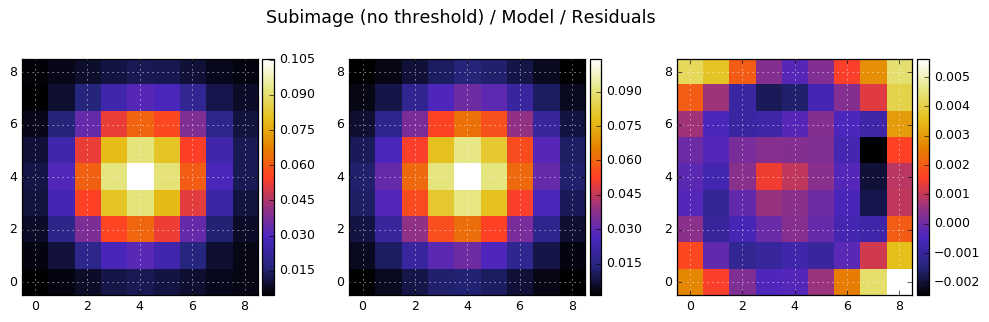

FWHM_y = 4.73321870932
FWHM_x = 4.47368242695

centroid y = [ 19.00668006]
centroid x = [ 18.99942447]
centroid y subim = [ 4.00668006]
centroid x subim = [ 3.99942447]

peak = 0.104130048421
theta = -0.594906560549


In [261]:
_ = vip.var.fit_2dgaussian(psf, crop=True, cropsize=9, debug=True)

We can use the mean of the FWHM in X and Y:

In [262]:
fwhm_naco = np.mean([4.73, 4.47])
print fwhm_naco

4.6


Let's finally define the pixel-scale for NACO (L band):

In [263]:
pxscale_naco = 0.027

[Go to the top](#Table-of-contents)

### 3.3. Pre-processing of ADI data

First thing we must do is to put the star at the center of the frames or the center of rotation. Image registration is an important step for any ADI post-processing algorithm and will maximize the SNR of any potential companion.

If we take a look at one single image we will see the dark hole clearly off-center:


Done frame cropping


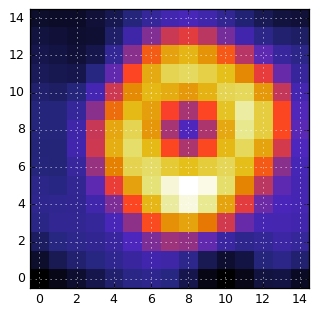

In [69]:
plots(vip.calib.frame_crop(cube_orig[0], 15), grid=True)

In VIP we have several recentering functions. We could use on this cube either a negative 2d Gaussian fit (assuming the dark hole corresponds witht the position of the star) or a fourier cross-correlation based method (using more information including the bright donut and the speckles). Let's proceed with a negative 2d Gaussian fit: 

In [70]:
from vip.calib import cube_recenter_gauss2d_fit

It's important to run the algorithm once with the *debug* parameter set to True in order to check the results of the 2d Gaussian fit. You may need to adjust the position of the center of the structure to be fitted and the *subi_size*. When using the debug mode set *nproc* to 1 or the plots won't show up. Also try to run the debug mode in a subset of the images (a few of them) to avoid very long output.

In [71]:
cube, shy, shx = cube_recenter_gauss2d_fit(cube_orig, 51, 51, fwhm_naco, nproc=1, 
                                           subi_size=1, full_output=True, 
                                           debug=False)

-------------------------------------------------------------------
Starting time: 2016-02-10 01:29:29
-------------------------------------------------------------------
Looping through frames
0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 0.369 sec
Running time:  0:00:00.394366
-------------------------------------------------------------------


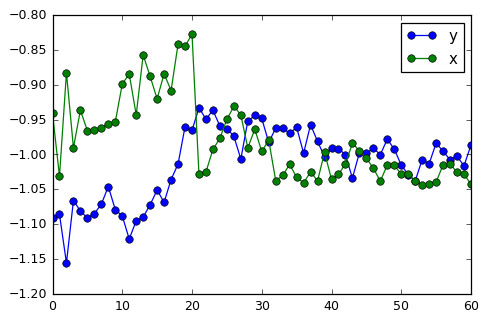

In [72]:
plot(shy, 'o-', label='y')
plot(shx, 'o-', label='x')
legend(loc='best')

Looking at the first frame again we see that the shift applied is correct:


Done frame cropping


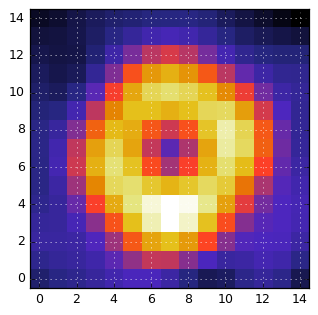

In [73]:
plots(vip.calib.frame_crop(cube[0], 15), grid=True)

We can inspect the result in ds9:

In [56]:
ds9.display(cube)

The assumption of VIP is that the initial cubes have been calibrated, meaning that routine procedures of dark/sky subtraction and flat-fielding have been performed. VIP includes in its subpackage **calib** a few bad-pixel correction routines, nan-correction function, several bad-frames detection functions as well as pixel upscaling routines. None of this will be used/needed for this cube.

For saving any results (1, 2 or 3d arrays) in FITS format please use:

In [369]:
vip.fits.write_fits?

[Go to the top](#Table-of-contents)

### 3.4. ADI median subtraction

First thing we can try is a median subtraction approach (ADI original post-processing):

In [57]:
fr_adi = vip.madi.adi(cube, angs, mode='simple')

-------------------------------------------------------------------
Starting time: 2016-02-10 01:24:33
-------------------------------------------------------------------
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.032888
-------------------------------------------------------------------


Annular mode:

In [58]:
fr_adi_an = vip.madi.adi(cube, angs, fwhm_naco, mode='annular')

-------------------------------------------------------------------
Starting time: 2016-02-10 01:24:35
-------------------------------------------------------------------
N annuli = 5 , FWHM = 4.6 

PA threshold 58.57 is too big, will be set to 36.61
Annulus 1, PA thresh = 36.61, Inn radius = 0.00, Ann center = 4.50 
Annulus 2, PA thresh = 19.52, Inn radius = 9.00, Ann center = 13.50 
Annulus 3, PA thresh = 11.71, Inn radius = 18.00, Ann center = 22.50 
Annulus 4, PA thresh = 8.37, Inn radius = 27.00, Ann center = 31.50 
Annulus 5, PA thresh = 6.67, Inn radius = 35.00, Ann center = 39.50 
Optimized median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.127850
-------------------------------------------------------------------


Plotting:

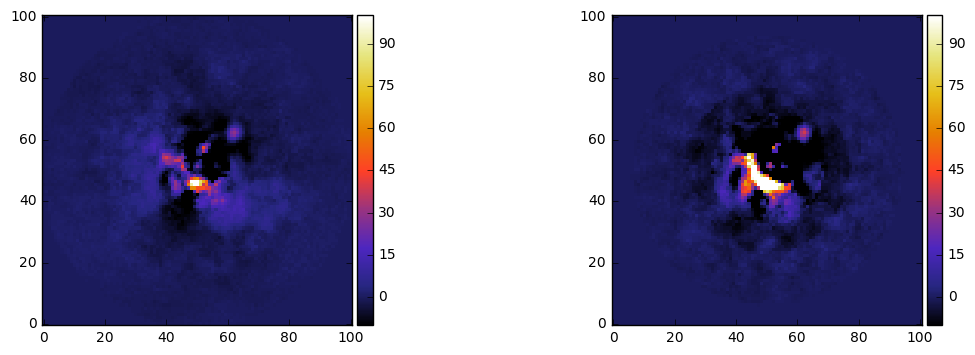

In [59]:
plots(fr_adi, fr_adi_an, rows=1, dpi=100, vmin=-10, vmax=100, colorb=True)

In [60]:
ds9.display(fr_adi, fr_adi_an)

[Go to the top](#Table-of-contents)

### 3.5. Detection function

Let's try the detection module, providing the processed frame, the FWHM in pixels and a PSF (what the planet should look like). Take a look at the help/docstring for an in-depth explanation of the function. 

In [23]:
vip.phot.detection?

Depending on the *mode* and the rest of parameters the results will be different. 
The final step is always to check the SNR defined with *snr_thresh*. By default we adopt the definition of SNR given in Mawet el al. 2014, where they propose to use a student t-test for the problem of planet detection in the case of small sample statistics, which arise in high contrast imaging at small angles. 

The main idea is to test a given speckle against the background resolution elements (at the same angular separation or radial distance from the center):

$$SNR≡ \frac{\overline{x}_1 - \overline{x}_2}{s_2\sqrt{1+\frac{1}{n_2}}}􏰙,$$

where $\overline{x}_1$ is the flux of the tested resolution element (blue dot in figure), $\overline{x}_2$ and $s_2$ are the mean and empirical standard deviation of the fuxes of the background resolution elements (red dots in figure) and $n_2$ the number of such background resolution elements.

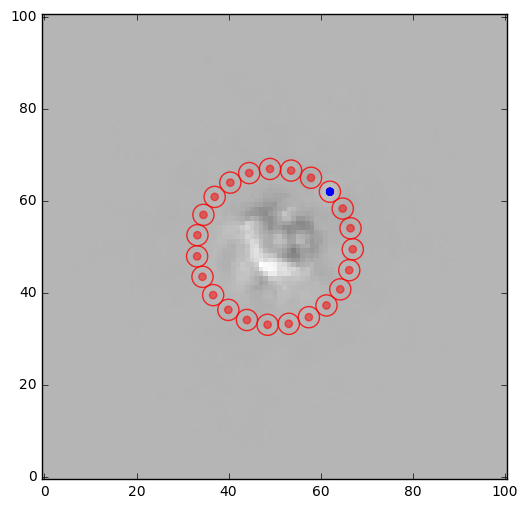

3.1541209184610364

In [274]:
vip.phot.snr_ss(fr_adi_an, (62,62), fwhm_naco, plot=True)

In VIP there is also a function (vip.phot.snr_peakstddev()) for getting the SNR in the classical way (without taking into account resolution elements but considering pixels as independent). In this case the SNR is taken as the ratio of pixel value of the planet (test speckle) and the noise computed as the standard deviation of the pixels in an annulus at the same radial distance from the center of the frame. The diameter of the signal aperture and the annulus width is in both cases 1 FWHM ~ 1 lambda/D.

Let's go back to the detection function and try the computer vision blob-detection method: Laplacian of Gaussian (http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.blob_log). 

In [81]:
ds9.display(psf)

FWHM = 4.80097325514

Blobs found: 4
 ycen   xcen
------ ------
54.815 	 59.504
63.269 	 51.208
66.908 	 62.290
71.965 	 71.882
_________________________________________
X,Y = (49.5,44.8)
SNR constraint NOT fulfilled
SNR = 3.385
_________________________________________
X,Y = (41.2,53.3)
SNR constraint NOT fulfilled
SNR = 1.697
_________________________________________
X,Y = (52.3,56.9)
SNR constraint NOT fulfilled
SNR = 0.181
_________________________________________
X,Y = (61.9,62.0)
SNR constraint NOT fulfilled
SNR = 2.091

_________________________________________
Input frame showing all the detected blobs / potential sources:
In RED circles those that did not pass the SNR and 2dGaussian 
fit constraints while in CYAN circles those that passed them.


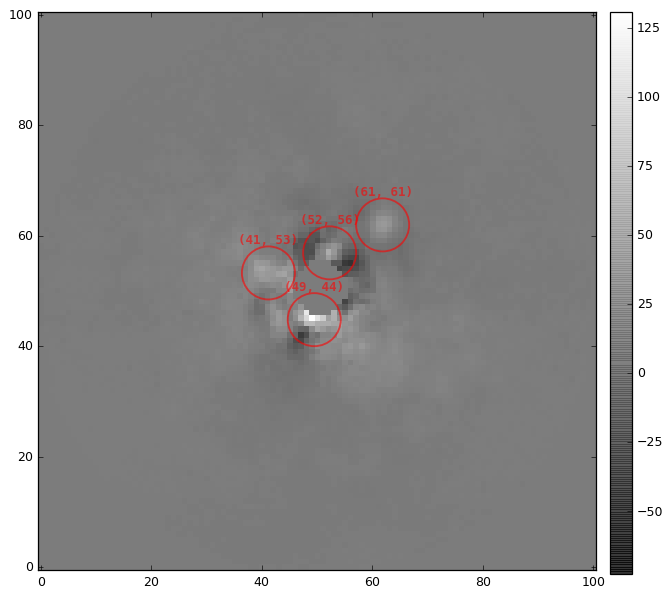

(array([], dtype=float64), array([], dtype=float64))

In [89]:
vip.phot.detection(fr_adi, psf, debug=False, mode='log', snr_thresh=5, 
                   bkg_sigma=3, matched_filter=False)

Planet 'b' is highlighted but with rather small SNR (~2). We can try the frame obtained with the 'annular' mean subtraction, this time the SNR is ~3.3.

[Go to the top](#Table-of-contents)

### 3.6. Full-frame PCA

Now let's try the PCA based algorithms:

In [90]:
fr_pca1 = vip.pca.pca(cube, angs, ncomp=5, mask_center_px=None)

-------------------------------------------------------------------
Starting time: 2016-02-10 01:40:27
-------------------------------------------------------------------
Done building the matrix, NxP where N=# frames and P=# pixels per frame
Done SVD/PCA with numpy SVD (LAPACK)
Running time:  0:00:00.047085
-------------------------------------------------------------------
Done de-rotating and combining
Running time:  0:00:00.080573
-------------------------------------------------------------------


Here we show the 2 previous frames plus the PCA (rightmost one):

In [91]:
ds9.display(fr_adi, fr_adi_an, fr_pca1)

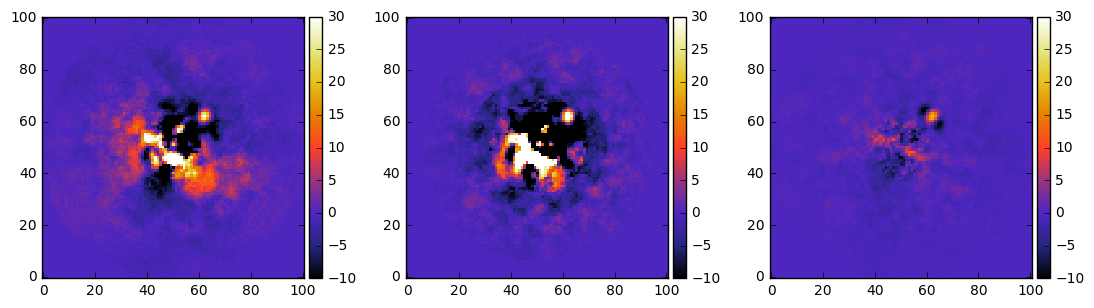

In [92]:
plots(fr_adi, fr_adi_an, fr_pca1, rows=1, dpi=100, vmin=-10, vmax=30, colorb=True)

Let's re-run the detection function on this PCA final frame:

FWHM = 4.80097325514

Blobs found: 4
 ycen   xcen
------ ------
56.241 	 67.038
63.205 	 51.063
68.852 	 62.705
71.878 	 71.893
_________________________________________
X,Y = (57.0,46.2)
SNR constraint NOT fulfilled
SNR = 2.164
_________________________________________
X,Y = (41.1,53.2)
SNR constraint NOT fulfilled
SNR = 2.898
_________________________________________
X,Y = (52.7,58.9)
SNR constraint NOT fulfilled
SNR = 0.592
_________________________________________
X,Y = (61.9,61.9)


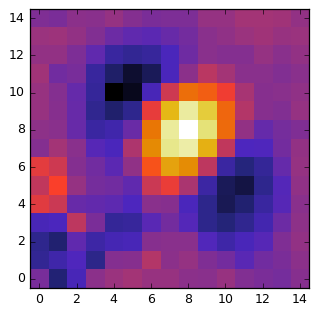

Coordinates of chosen px X,Y = 61.8928450697,61.8784104979
Central pixel SNR: 
SNR = 7.07667245258
Flux = 409.143, Mean Flux BKG aper = 198.347
Stddev BKG aper = 29.070
-----------------------------------------
In 1*FWHM circular aperture:
Integrated flux = 201.070
Mean SNR = 4.729
Max SNR = 6.849, stddev SNRs = 1.418
-----------------------------------------

_________________________________________
Input frame showing all the detected blobs / potential sources:
In RED circles those that did not pass the SNR and 2dGaussian 
fit constraints while in CYAN circles those that passed them.


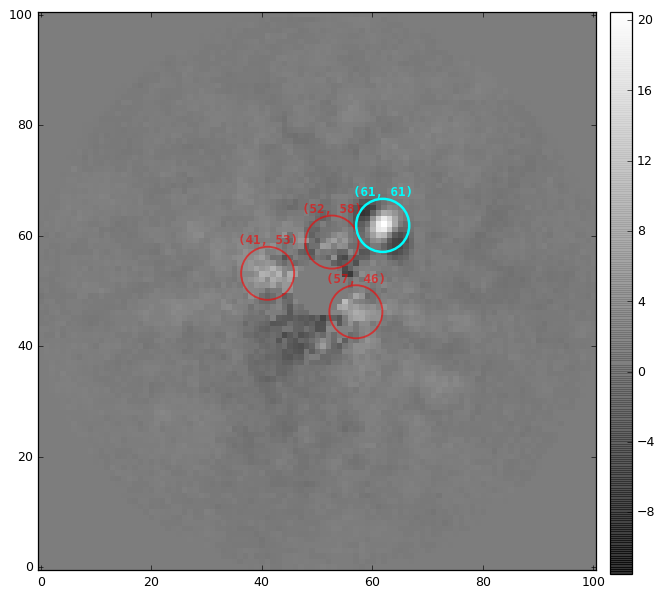

(array([ 61.8784105]), array([ 61.89284507]))

In [253]:
vip.phot.detection(fr_pca1, psf, bkg_sigma=3, debug=False, mode='log', 
                   snr_thresh=5, plot=True, verbose=True)

Clearly modeling the background (leaked starlight + static and quasi-static speckles) with PCA is better than just a the subtraction of the median frame. We chose 5 principal componenets and we already reached ~7 of SNR. Can we get a better SNR with full-frame PCA?

In [102]:
vip.pca.pca_optimize_snr?

-------------------------------------------------------------------
Starting time: 2016-02-10 15:34:57
-------------------------------------------------------------------
Done SVD/PCA with numpy SVD (LAPACK)
Number of evaluated steps 16
Optimal number of PCs = 17, for SNR=12.5346248633

Running time:  0:00:00.782648
-------------------------------------------------------------------

Coordinates of chosen px X,Y = 62,62
Central pixel SNR: 
SNR = 12.5346248633
Flux = 114.630, Mean Flux BKG aper = 45.746
Stddev BKG aper = 5.375
-----------------------------------------
In 1*FWHM circular aperture:
Integrated flux = 65.611
Mean SNR = 9.653
Max SNR = 12.793, stddev SNRs = 2.729
-----------------------------------------


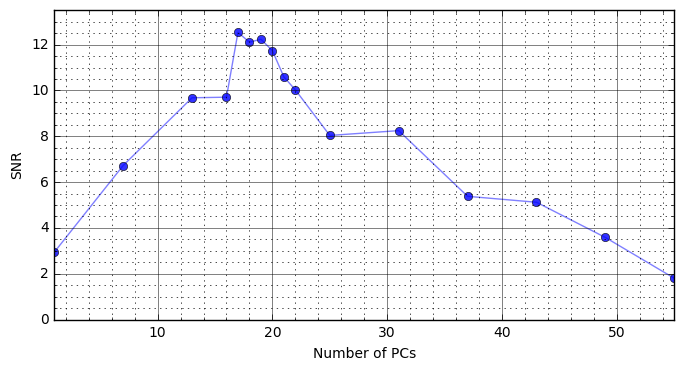

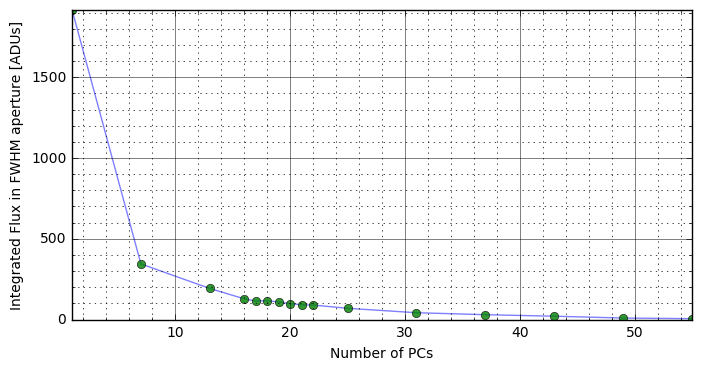

In [275]:
opt_pcs = vip.pca.pca_optimize_snr(cube, angs, fwhm=fwhm_naco, source_xy=(62,62), 
                                   mask_center_px=None, fmerit='px', 
                                   range_pcs=None)

In [276]:
fr_pca2 = vip.pca.pca(cube, angs, ncomp=opt_pcs, mask_center_px=None)

-------------------------------------------------------------------
Starting time: 2016-02-10 15:35:11
-------------------------------------------------------------------
Done building the matrix, NxP where N=# frames and P=# pixels per frame
Done SVD/PCA with numpy SVD (LAPACK)
Running time:  0:00:00.035451
-------------------------------------------------------------------
Done de-rotating and combining
Running time:  0:00:00.059758
-------------------------------------------------------------------


In [105]:
ds9.display(fr_pca1, fr_pca2)

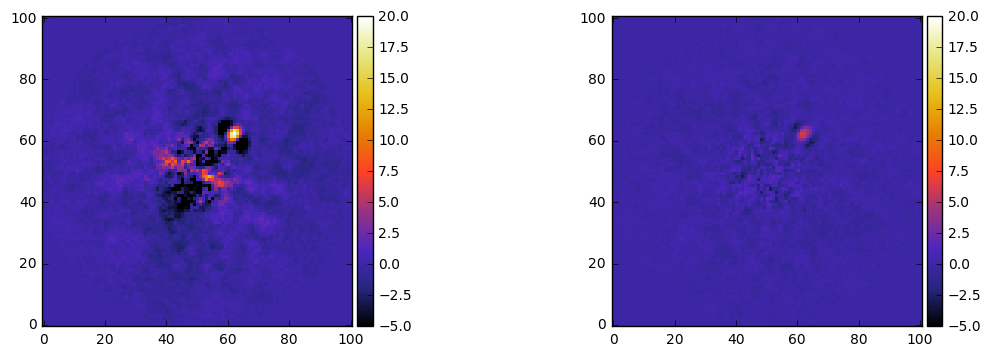

In [277]:
plots(fr_pca1, fr_pca2, rows=1, dpi=100, vmin=-5, vmax=20, colorb=True)

We see an improvement in SNR (11). On the other hand this dataset has a large range of rotation:

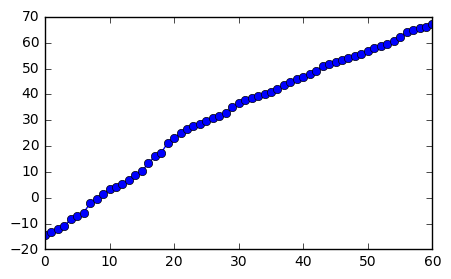

In [107]:
figure(figsize=(5,3))
plot(angs, 'o-')

[Go to the top](#Table-of-contents)

### 3.7. Local PCA

We can exploit the 80 degrees of rotation by using **local PCA** and applying a PA threshold. The function pca_adi_annular_quad process the array in quadrants of annulus in a parallel fashion. The improvement in speed is only seen in machines with more than 4 cores.

In [111]:
from vip.pca.pca_local import pca_adi_annular_quad

In [109]:
fr_pca_suban20 = pca_adi_annular_quad(cube, angs, fwhm=fwhm_naco, ncomp=20, 
                                      asize=3, delta_rot=0.5, nproc=1)

-------------------------------------------------------------------
Starting time: 2016-02-10 10:58:29
-------------------------------------------------------------------
# annuli = 3, Ann width = 13, FWHM = 4.600

PCA will be done locally per annulus and per quadrant

Annulus 1, PA thresh = 20.27, Inn radius = 0.00, Ann center = 6.50 
Done PCA with randsvd for current annulus
Running time:  0:00:00.348008
-------------------------------------------------------------------
Annulus 2, PA thresh = 6.76, Inn radius = 13.00, Ann center = 19.50 
Done PCA with randsvd for current annulus
Running time:  0:00:00.822448
-------------------------------------------------------------------
Annulus 3, PA thresh = 4.18, Inn radius = 25.00, Ann center = 31.50 
Done PCA with randsvd for current annulus
Running time:  0:00:01.367739
-------------------------------------------------------------------
Done derotating and combining.
Running time:  0:00:01.392299
-------------------------------------------

The parameter *ncomp* can be set to None for letting the algorithm define automatically the residuals after the subtraction of the PCA approximation (à la LOCI).

In [782]:
fr_pca_suban_auto = pca_adi_annular_quad(cube, angs, fwhm=fwhm_naco, ncomp=None, 
                                         asize=3, delta_rot=0.5, debug=True)

-------------------------------------------------------------------
Starting time: 2016-02-12 11:34:27
-------------------------------------------------------------------
# annuli = 3, Ann width = 13, FWHM = 4.600

PCA will be done locally per annulus and per quadrant

Annulus 1, PA thresh = 20.27, Inn radius = 0.00, Ann center = 6.50 
Numb PCs: min=23.0 / 1st QU=28.0 / ave=34.2 / med=34.0 / 3rd QU=39.0 / max=48.0
Size LIB: min=23.0 / 1st QU=28.0 / ave=34.2 / med=34.0 / 3rd QU=39.0 / max=48.0
Numb PCs: min=23.0 / 1st QU=28.0 / ave=34.2 / med=34.0 / 3rd QU=39.0 / max=48.0
Size LIB: min=23.0 / 1st QU=28.0 / ave=34.2 / med=34.0 / 3rd QU=39.0 / max=48.0
Numb PCs: min=23.0 / 1st QU=28.0 / ave=34.2 / med=34.0 / 3rd QU=39.0 / max=48.0
Size LIB: min=23.0 / 1st QU=28.0 / ave=34.2 / med=34.0 / 3rd QU=39.0 / max=48.0
Numb PCs: min=23.0 / 1st QU=28.0 / ave=34.2 / med=34.0 / 3rd QU=39.0 / max=48.0
Size LIB: min=23.0 / 1st QU=28.0 / ave=34.2 / med=34.0 / 3rd QU=39.0 / max=48.0
Done PCA with randsvd 

In [783]:
ds9.display(fr_pca_suban20, fr_pca_suban_auto)

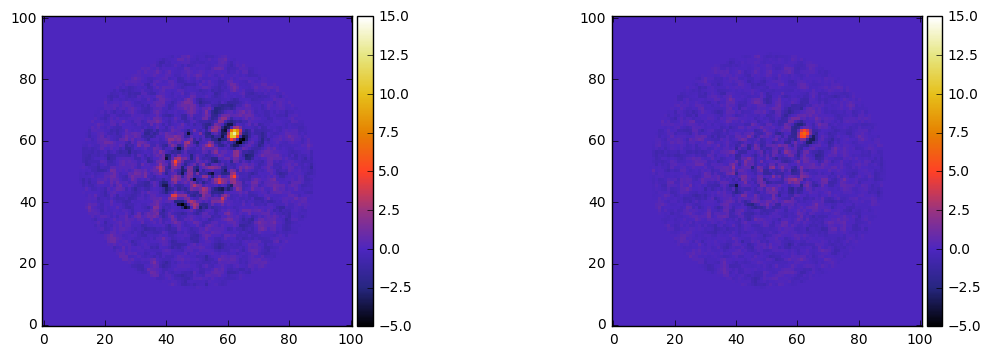

In [784]:
plots(fr_pca_suban20, fr_pca_suban_auto, dpi=100, vmin=-5, vmax=15, colorb=True)

We can have a quick report on the frames without running the detection function:

In [269]:
_ = vip.phot.frame_quick_report(fr_pca_suban20, fwhm=fwhm_naco, source_xy=(62,62))

Coordinates of chosen px X,Y = 62,62
Central pixel SNR: 
SNR = 13.2182120054
Flux = 210.232, Mean Flux BKG aper = 109.475
Stddev BKG aper = 7.455
-----------------------------------------
In 1*FWHM circular aperture:
Integrated flux = 97.793
Mean SNR = 7.818
Max SNR = 16.490, stddev SNRs = 3.496
-----------------------------------------


In [270]:
_ = vip.phot.frame_quick_report(fr_pca_suban_auto, fwhm=fwhm_naco, source_xy=(62,62))

Coordinates of chosen px X,Y = 62,62
Central pixel SNR: 
SNR = 11.1454054182
Flux = 106.125, Mean Flux BKG aper = 55.779
Stddev BKG aper = 4.418
-----------------------------------------
In 1*FWHM circular aperture:
Integrated flux = 48.990
Mean SNR = 6.642
Max SNR = 15.448, stddev SNRs = 3.755
-----------------------------------------


And we gain in SNR (~13 or ~16 if we consider Max SNR) thanks to decreasing the companion self-subtraction. The value of Max SNR tells the maximun SNR reached by shifting the test resolution element in a 1xFWHM aperture. We se the SNR obtained by letting the algorithm decide the number of PCs per patch is very good already.

In [273]:
ds9.display(fr_adi, fr_pca2, fr_pca_suban_auto)

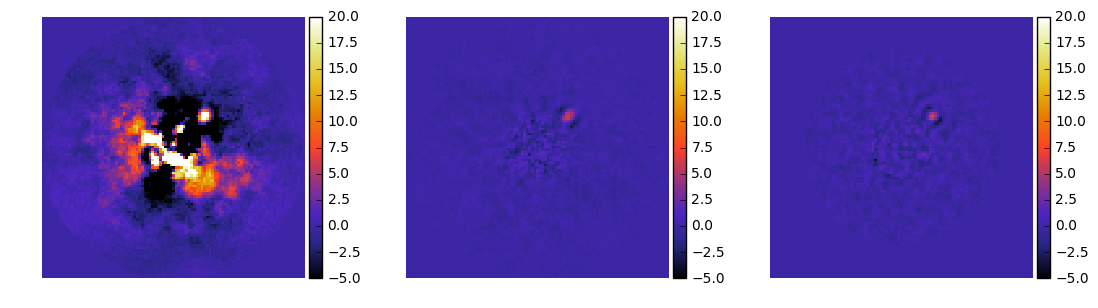

In [272]:
plots(fr_adi, fr_pca2, fr_pca_suban_auto, dpi=100, vmin=-5, vmax=20, colorb=True, noaxis=True)

[Go to the top](#Table-of-contents)

### 3.8. SNR map generation

Let's get an SNR map of the last processed frame with the function *snrmap*. It has a parameter *nproc* for exploiting multi-core systems which by default is None, meaning that it will get the number of physical cores available in the system.

-------------------------------------------------------------------
Starting time: 2016-02-10 16:52:33
-------------------------------------------------------------------


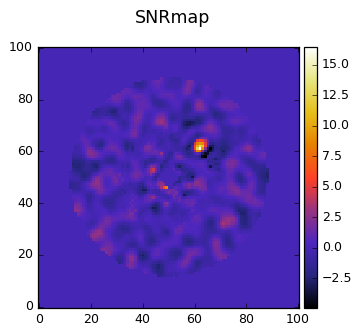

SNR map created using 2 processes.
Running time:  0:00:22.180784
-------------------------------------------------------------------


In [359]:
snrmap = vip.phot.snrmap(fr_pca_suban20, fwhm_naco, plot=True)

In [286]:
ds9.display(snrmap)

The SNR map computation can become costly when working on large images (500x500 or larger) and in a single- or dual-core machine. When we are interested in a given blob, workaround is to mask out the pixels outside the annulus where it is located. This can be acomplished with the function:

In [289]:
vip.var.get_annulus?

In [290]:
from vip.var import get_annulus

-------------------------------------------------------------------
Starting time: 2016-02-10 16:53:13
-------------------------------------------------------------------


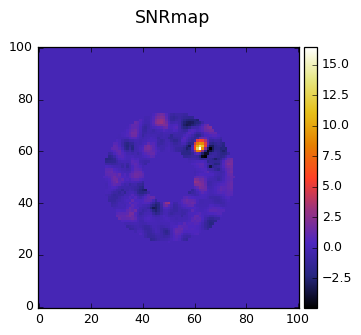

SNR map created using 2 processes.
Running time:  0:00:06.823178
-------------------------------------------------------------------


In [361]:
snrmap_ann = vip.phot.snrmap(get_annulus(fr_pca_suban20, inner_radius=10, width=15), 
                         fwhm_naco, plot=True)

In case we really need the SNRmap of the full big frame, a good option is to use the function *snrmap_fast*. It uses an approximated SNR definition that yields close results to the one mentioned earlier. 

-------------------------------------------------------------------
Starting time: 2016-02-10 17:02:02
-------------------------------------------------------------------


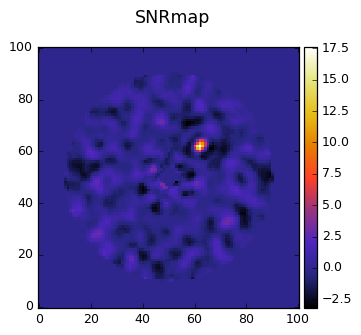

SNR map created using 1 processes.
Running time:  0:00:01.275643
-------------------------------------------------------------------


In [368]:
snrmap_fast = vip.phot.snrmap_fast(fr_pca_suban20, fwhm_naco, nproc=1, plot=True)

[Go to the top](#Table-of-contents)

### 3.9. Flux and position estimation

Negative fake companion: 


- Estimate the biased position and flux of the planet from the first reduced image.
- Use the measured off-axis PSF as a template to remove the first estimate from the cleaned data cube.
- Process the cube with PCA.
- Iterate on the position and flux until a well-chosen function of merit is minimized.  
        
$chi^2 = sum(|I_j|),$ where $j \in {1,...,N}$ and $N$ the total number of pixels contained in a circular aperture (4xfwhm).

[Go to the top](#Table-of-contents)

#### 3.9.1. Nelder-Mead based optimization

We can get a first guess of the flux and position by running a grid naive minimization and a Nelder-mead based minimization.

In [46]:
vip.negfc.firstguess?


************************************************************
             Planet 0           
************************************************************

Planet 0: flux estimation at the position [62,62], running ...
Step | flux    | chi2r
1/10   400.000   0.605
2/10   433.333   0.578
3/10   466.667   0.559
4/10   500.000   0.535
5/10   533.333   0.523
6/10   566.667   0.511
7/10   600.000   0.507
8/10   633.333   0.517
9/10   666.667   0.538
10/10   700.000   0.559


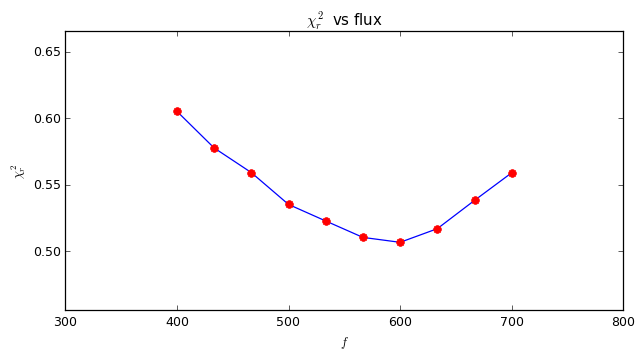

Planet 0: preliminary guess: (r,theta,f) = (16.2634559673,45.0,600.0)
Planet 0: Simplex Nelder-Mead minimization, running ...
Planet 0: Success: True, nit: 52, nfev: 118, chi2r: 0.44026304095
message: Optimization terminated successfully.
Planet 0: first guess: (r_0, theta_0, f_0) = (16.5158405103,44.6413969911,568.047237208)

************************************************************
DONE !
************************************************************
[ 61.60514136] [ 61.75132681]


In [48]:
# Initial guess of the position by examining a flux frame or SNR map
planet_xycoord = np.array([[62,62]])
# Naive minimization of the chi^2 by trying this grid of values for the flux 
f_range = np.linspace(400,700,10)

# If the parameter simplex=True then a Nelder-Mead (simplex) minimization is 
# done based on the preliminary guess of the naive minimization. Here we setup
# the maximum number of iterations and error (see scipy.minimize function)
simplex_options = {'xtol':1e-1, 'maxiter':500, 'maxfev':1000}

# plot with the behaviour of the chi^2 with the naive minimization
figure_options = {'color':'b','marker':'o', 
                  'xlim': [f_range[0]-100,f_range[-1]+100], 
                  'title':r'$\chi^2_{r}$ vs flux'}

r_0, theta_0, f_0 = vip.negfc.firstguess(cube, angs, psf, 10, pxscale_naco,
                                         3*fwhm_naco, 4*fwhm_naco, 
                                         planets_xy_coord=planet_xycoord,
                                         f_range=f_range, simplex=True, 
                                         simplex_options=simplex_options,
                                         display=True, verbose=True, save=False,
                                         figure_options=figure_options)

centy, centx = vip.var. frame_center(cube[0])
posy = r_0 * np.sin(np.deg2rad(theta_0)) + centy
posx = r_0 * np.cos(np.deg2rad(theta_0)) + centx
print posy, posx

Nelder-Mead converged!

[Go to the top](#Table-of-contents)

#### 3.9.2. Planet removal using negative fake companion technique

Let's use the values obtained with the simples optimization:

In [439]:
vip.negfc.cube_planet_free?

In [440]:
plpar_bpicb = np.array([[16.5158405103,44.6413969911,568.047237208]])

cube_emp = vip.negfc.cube_planet_free(plpar_bpicb, cube, angs, psf, pxscale_naco)

In [441]:
fr_pca_emp = vip.pca.pca(cube_emp, angs, ncomp=opt_pcs, verbose=False)

Let's take a look at the PSF of the planet in the PCA full-frame image and the same PSF in the frame resulting of processing the empty cube:

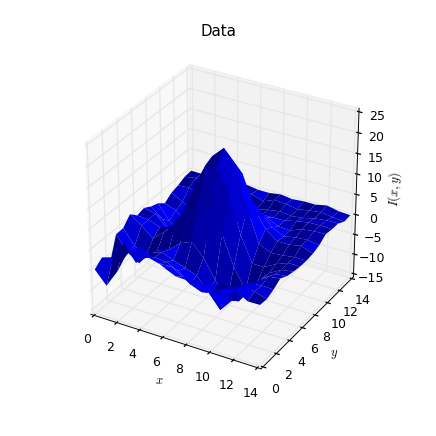

In [443]:
vip.var.plot_surface(fr_pca1, center=(62,62), size=15)

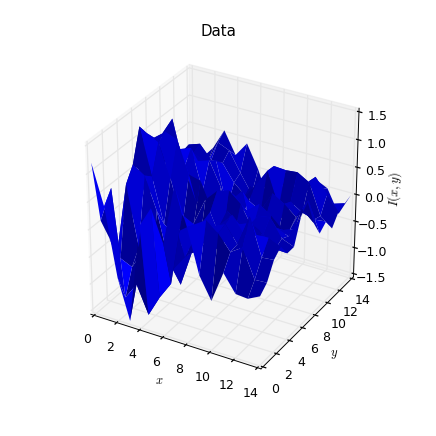

In [444]:
vip.var.plot_surface(fr_pca_emp, center=(62,62), size=15)

In [445]:
ds9.display(fr_pca1, fr_pca_emp)

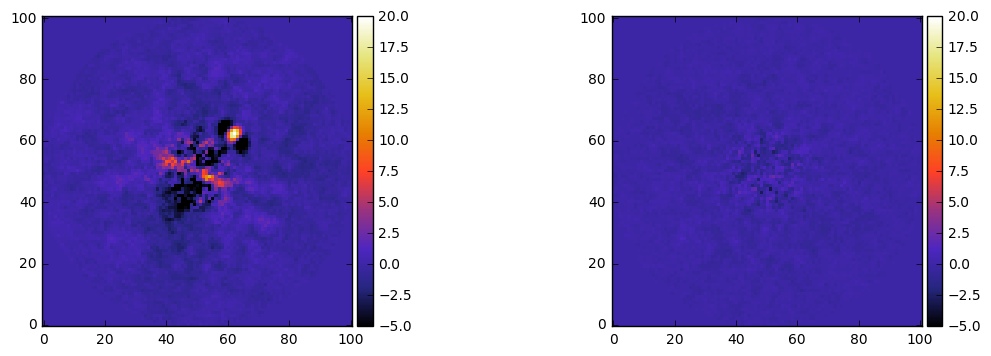

In [446]:
plots(fr_pca1, fr_pca_emp, dpi=100, vmin=-5, vmax=20, colorb=True)

[Go to the top](#Table-of-contents)

#### 3.9.3. Negative fake companion coupled with MCMC 

MCMC is a robust way of obtaining the flux and position since it returns the posterior distributions of the parameters and from them we can generate proper error bars. MCMC is a very costly, computationally, method and we won't show a full run here. 

In [56]:
# Walker initial states: each walker will start in a small ball around 
# this preferred position (first guess using naive or simplex minimization)
initialState = np.array([16.5158405103,44.6413969911,568.047237208])

# Parameters required for calculating the reduced chi^2
ncomp = opt_pcs
annulus_width = 3*fwhm_naco
aperture_radius = 4*fwhm_naco

# for the MCMC sampler
nwalkers, itermin, itermax = (30,100,400)
output_file = 'Cube{}_ncomp_{}_date_{}'.format('x',ncomp,'20151028')

In [57]:
chain = vip.negfc.run_mcmc_astrometry(cube, angs, psf, ncomp, pxscale_naco,                                
                                      annulus_width, aperture_radius, 
                                      cube_ref=None, svd_mode='lapack',
                                      nwalkers=nwalkers, bounds=None,
                                      initialState=initialState,
                                      niteration_min=itermin,
                                      niteration_limit=itermax,
                                      check_maxgap=50, threads=1,
                                      output_file=output_file,
                                      display=False, verbose=False, save=True, 
                                      rhat_threshold=1.01, niteration_supp=0)

Gelman-Rubin test OK 1/3
We have reached the limit number of steps without having converged

The file MCMC_results has been stored in the folder results/Cubex_ncomp_10_date_20151028/


In [58]:
import pickle

# Load the file
with open('./results/Cubex_ncomp_10_date_20151028/MCMC_results','rb') as fi:
    myPickler = pickle.Unpickler(fi)
    mcmc_result = myPickler.load()
    
print mcmc_result.keys()

# Extract the chain
chain = vip.negfc.chain_zero_truncated(mcmc_result['chain'])

['isamples', 'AR', 'chain', 'lnprobability', 'input_parameters']


[Go to the top](#Table-of-contents)

##### 3.9.3.1. Visualizing the MCMC chain: corner plots and walk plots 

Due to the small number of walkers and iterations convergence was not achieved.

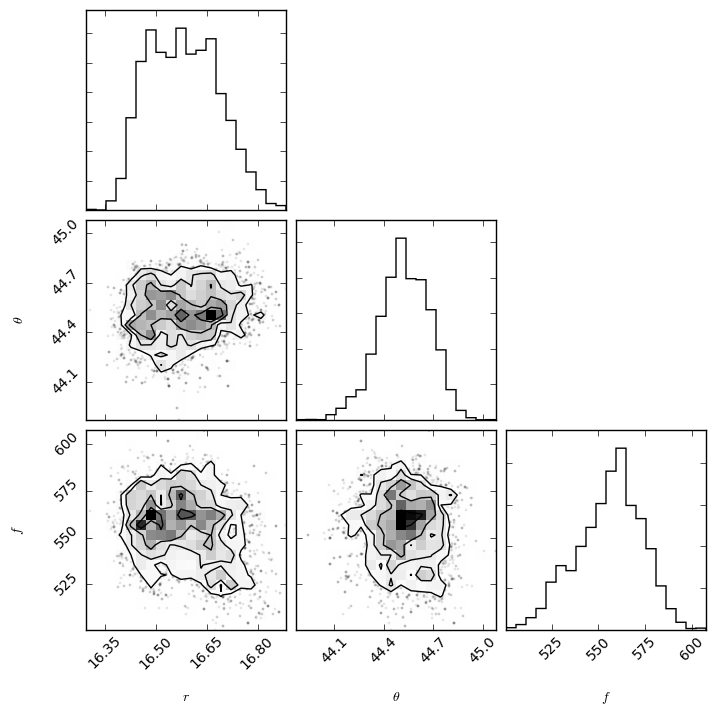

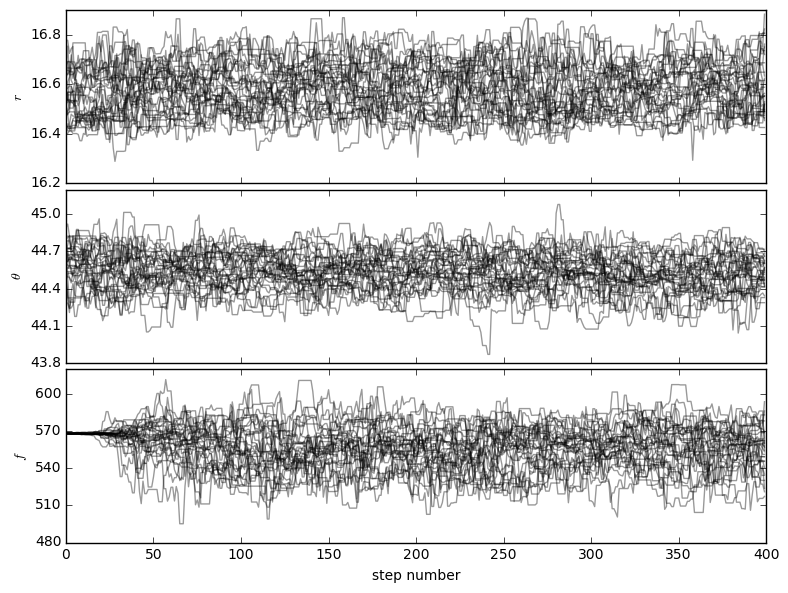

In [59]:
vip.negfc.showPDFCorner(chain)
vip.negfc.showWalk(chain)

[Go to the top](#Table-of-contents)

##### 3.9.3.2. Highly probable values and confidence intervals 

For determining the most highly probable value for each model parameter, as well as the 1-sigma confidence interval:

pourcentage for r: 68.1458333333%


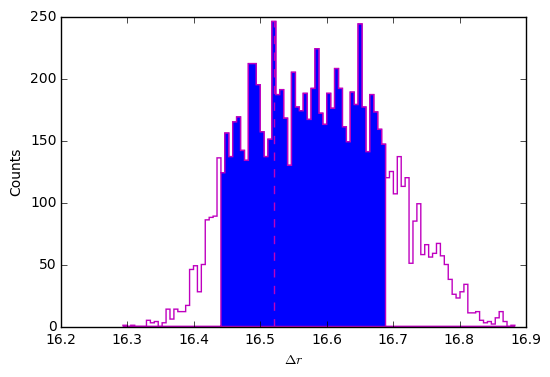

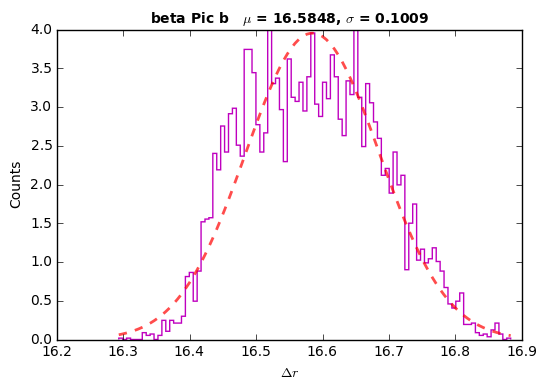

pourcentage for theta: 68.1458333333%


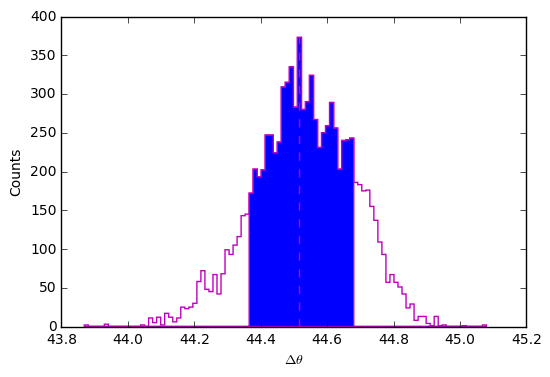

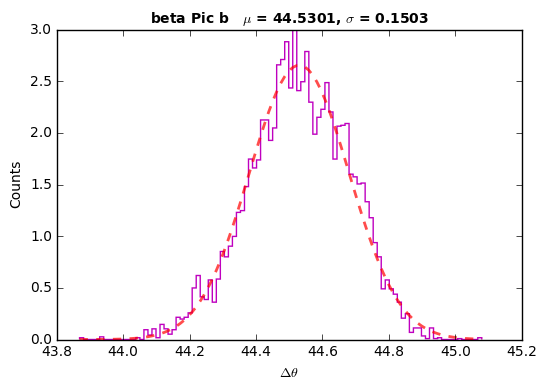

pourcentage for flux: 68.0416666667%


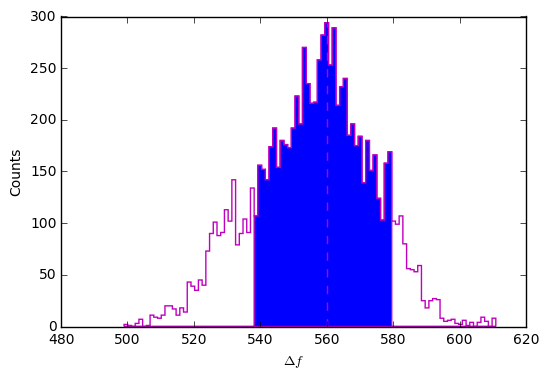

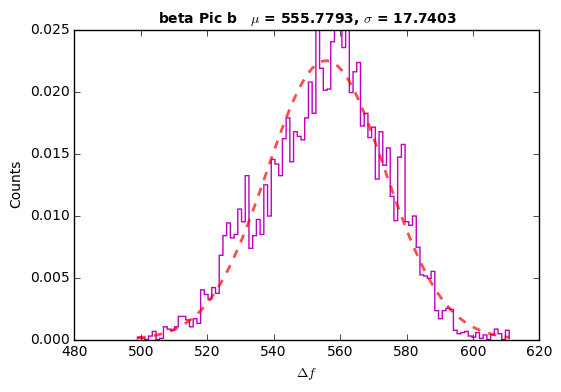


Confidence intervals:
r: 16.5203081123 [-0.0796452322135,0.168139934673]
theta: 44.5167643797 [-0.151373862294,0.163483771277]
flux: 559.964227813 [-21.8252707501,19.5867814424]

Gaussian fit results:
r: 16.5848266077 +-0.100908427417
theta: 44.5301128413 +-0.150280528335
f: 555.779337704 +-17.7403260568


In [60]:
burnin = 0.2
isamples_flat = chain[:,chain.shape[1]//(1/burnin):,:].reshape((-1,3))

val_max, conf = vip.negfc.mcmc_opt.confidence(isamples_flat,
                                              cfd = 68,
                                              gaussianFit = True, 
                                              verbose=True, 
                                              save=True,
                                              title='beta Pic b',
                                              edgecolor = 'm',
                                              facecolor = 'b')

Even though we haven't run the MCMC chain long enough to reach convergence, the result agrees well with the naive and Nelder-Mead minizations. It already gives us confidence intervals based on the posterior distribution of each parameter. Longer run (~few hours) with more walkers and more steps will be needed for convergence and higher confidence in the result.

[Go to the top](#Table-of-contents)

### 3.10. Throughput

Let's measure the throughput of PCA algorithm. That will give us an idea of how much PCA subtracts (biases) the signal from companions as a function of the distance from the center.

In [704]:
vip.phot.throughput?

We need an empty cube if we don't want to bias the throughput (due to the presence of a companion). Let's use the cube with the planet subtracted that we generated in the previous steps.

In [705]:
res_thr = vip.phot.throughput(cube_emp, angs, psf, fwhm_naco, pxscale_naco, 
                              ncomp=opt_pcs, algo='pca-adi-fullfr', nbranch=1, 
                              full_output=True)

-------------------------------------------------------------------
Starting time: 2016-02-11 22:44:19
-------------------------------------------------------------------
Cube without fake companions processed with pca
Running time:  0:00:00.073709
-------------------------------------------------------------------
Measured annulus-wise noise in resulting frame
Running time:  0:00:00.168678
-------------------------------------------------------------------
Fake companions injected in branch 1 (pattern 1/3)
Running time:  0:00:00.274346
-------------------------------------------------------------------
Cube with fake companions processed with pca
Running time:  0:00:00.346797
-------------------------------------------------------------------
Measured the annulus-wise throughput of pca
Running time:  0:00:00.347686
-------------------------------------------------------------------
Fake companions injected in branch 1 (pattern 2/3)
Running time:  0:00:00.460555
-----------------------

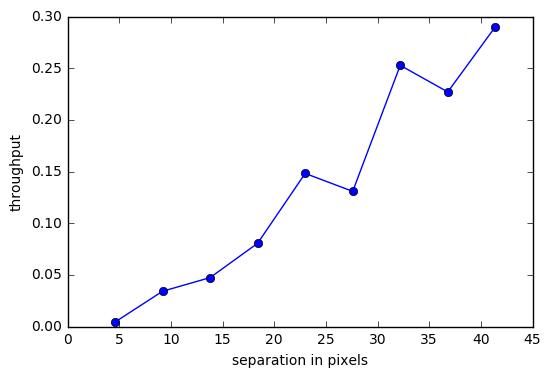

In [706]:
plot(res_thr[2], res_thr[0][0,:], 'o-')
ylabel('throughput')
xlabel('separation in pixels')
legend()

Let's compare with the local PCA:

In [707]:
res_thr2 = vip.phot.throughput(cube_emp, angs, psf, fwhm_naco, pxscale_naco, 
                               ncomp=30, algo='pca-adi-annular', nbranch=1, 
                               full_output=True, delta_rot=0.5, min_frames_pca=10, 
                               verbose=False, svd_mode='lapack', asize=2)

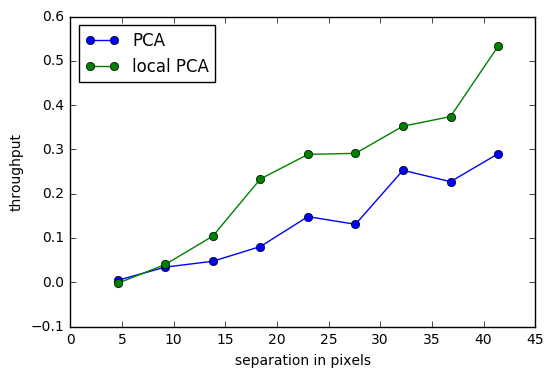

In [708]:
plot(res_thr[2], res_thr[0][0,:], 'o-', label='PCA')
plot(res_thr2[2], res_thr2[0][0,:], 'o-', label='local PCA')
ylabel('throughput')
xlabel('separation in pixels')
legend(loc='best')

We clearly see the gain in throughput by applying a parallactic angle rejection in our annular PCA processing. Here the *delta_rot* or amount of minimum rotation was decreased due the small number of frames, but increasing it to 1 or 1.5 (with a normal, bigger cube) will lead to better throughput.

[Go to the top](#Table-of-contents)

### 3.11. Contrast curve generation for ADI

Now let's see how to generate 5-sigma contrast curves for PCA-ADI. *Starphot* is the flux of the star (aperture photometry of the non-coronagraphic PSF before normalization).

In [709]:
starphot = 764939.6

Measuring the throughput 

SIGMA=5
STARPHOT=764939.6


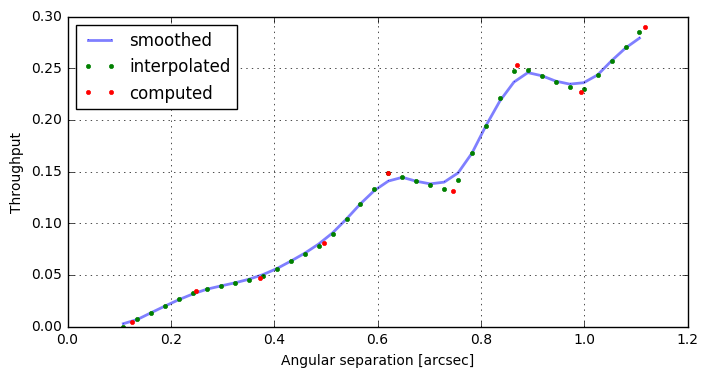

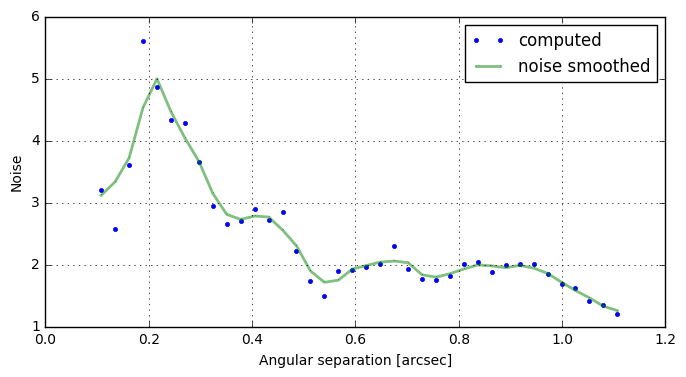

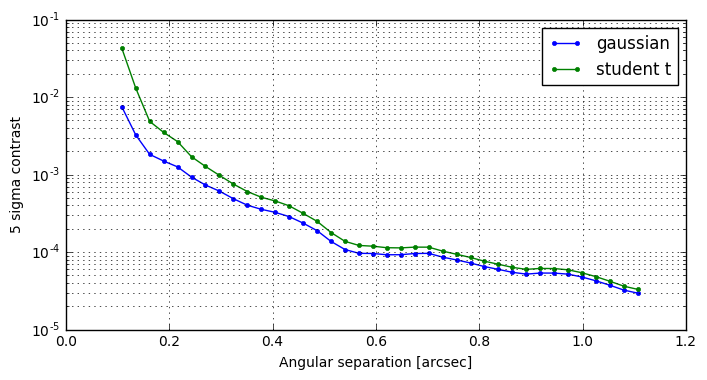

In [711]:
_ = vip.phot.contrcurve.contrast_curve(cube_emp, angs, psf, fwhm_naco, 
                                       pxscale_naco, starphot, sigma=5, 
                                       nbranch=1, ncomp=opt_pcs, debug=True)

[Go to the top](#Table-of-contents)

### 3.12. Generating synthetic planets

Now that we have an empty cube we can inject a fake companion with an arbitrary flux at 15 pxs from the center of the frame.

In [556]:
vip.phot.inject_fcs_cube?

In [551]:
cubefc = vip.phot.inject_fcs_cube(cube_emp, psf, angs, flevel=250, 
                                  plsc=pxscale_naco, rad_arcs=[pxscale_naco*15], 
                                  theta=240, n_branches=1)

Let's try to recover it with the optimal full-frame PCA post-processing:

-------------------------------------------------------------------
Starting time: 2016-02-11 01:05:37
-------------------------------------------------------------------
Done SVD/PCA with numpy SVD (LAPACK)
Number of evaluated steps 14
Optimal number of PCs = 18, for SNR=4.72867293723

Running time:  0:00:02.702001
-------------------------------------------------------------------

Coordinates of chosen px X,Y = 42,37
Central pixel SNR: 
SNR = 7.33104086617
Flux = 68.265, Mean Flux BKG aper = 44.625
Stddev BKG aper = 3.143
-----------------------------------------
In 1*FWHM circular aperture:
Integrated flux = 22.724
Mean SNR = 4.729
Max SNR = 8.918, stddev SNRs = 2.193
-----------------------------------------


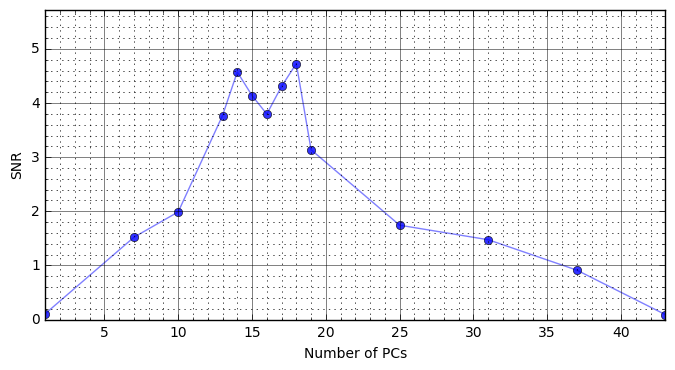

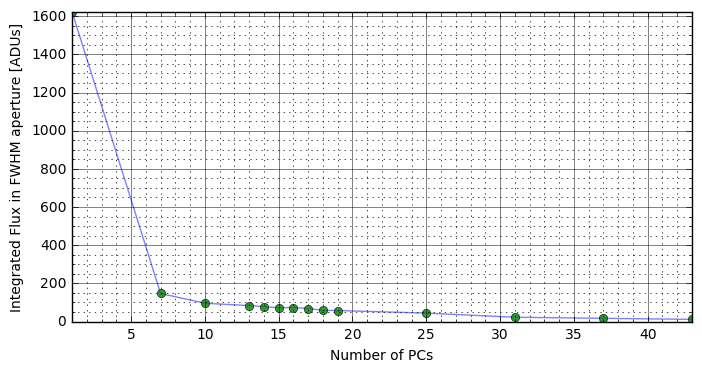

In [473]:
opt_pcs2 = vip.pca.pca_optimize_snr(cubefc, angs, fwhm=fwhm_naco, source_xy=(42,37), 
                                   mask_center_px=None, fmerit='mean', 
                                   range_pcs=None)

In [474]:
fr_pca3 = vip.pca.pca(cubefc, angs, ncomp=opt_pcs2)

-------------------------------------------------------------------
Starting time: 2016-02-11 01:05:52
-------------------------------------------------------------------
Done building the matrix, NxP where N=# frames and P=# pixels per frame
Done SVD/PCA with numpy SVD (LAPACK)
Running time:  0:00:00.030956
-------------------------------------------------------------------
Done de-rotating and combining
Running time:  0:00:00.057994
-------------------------------------------------------------------


In [475]:
ds9.display(fr_pca3)

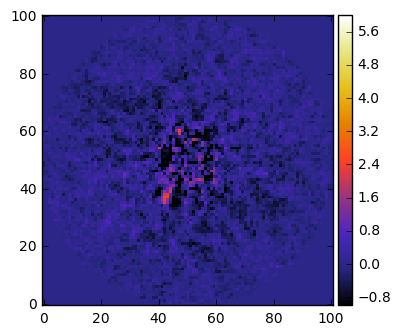

In [476]:
plots(fr_pca3, dpi=100, vmin=-1, vmax=6, colorb=True)

In [487]:
_ = vip.phot.frame_quick_report(fr_pca3, fwhm=fwhm_naco, source_xy=(42,37))

Coordinates of chosen px X,Y = 42,37
Central pixel SNR: 
SNR = 7.33104086617
Flux = 68.265, Mean Flux BKG aper = 44.625
Stddev BKG aper = 3.143
-----------------------------------------
In 1*FWHM circular aperture:
Integrated flux = 22.724
Mean SNR = 4.729
Max SNR = 8.918, stddev SNRs = 2.193
-----------------------------------------


[Go to the top](#Table-of-contents)

### 3.13. LLSG

Let's try our Local Low-rank plus Sparse plus Gaussian-noise decomposition (Gomez Gonzalez et al. 2016). This first version of our algorithm aims at decomposing ADI cubes into three terms L+S+G (low-rank, sparse and Gaussian noise). Separating the noise from the S component (where the moving planet should stay) allow us to increase the SNR of potential planets. 

Let's try it on the Beta Pictores cube:

In [753]:
fr_llsg = vip.llsg.llsg(cube, angs, fwhm_naco, rank=5, thresh=3, max_iter=50)

-------------------------------------------------------------------
Starting time: 2016-02-12 01:26:00
-------------------------------------------------------------------
5 annuli, Ann width = 10, FWHM = 4.600

Running time:  0:00:01.465762
-------------------------------------------------------------------


Let's plot it along the full-frame ADI PCA result, after the optimization of the number of PCs:

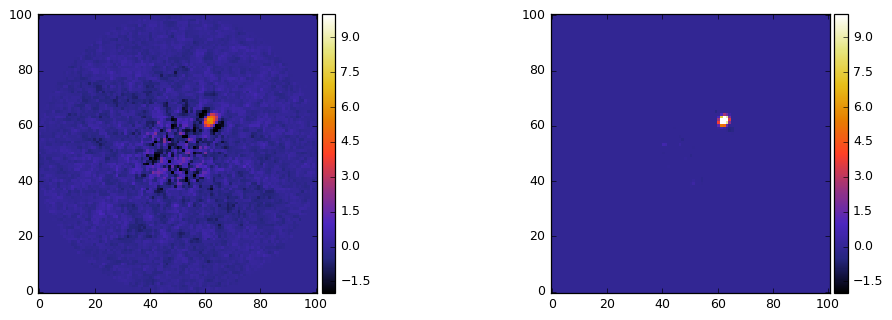

In [754]:
plots(fr_pca2, fr_llsg, vmin=-2, vmax=10, colorb=True)

In [416]:
_ = vip.phot.frame_quick_report(fr_llsg, fwhm=fwhm_naco, source_xy=(62,62))

Coordinates of chosen px X,Y = 62,62
Central pixel SNR: 
SNR = 159.841969935
Flux = 114.295, Mean Flux BKG aper = 12.116
Stddev BKG aper = 0.625
-----------------------------------------
In 1*FWHM circular aperture:
Integrated flux = 102.006
Mean SNR = 166.867
Max SNR = 922.877, stddev SNRs = 188.941
-----------------------------------------


A SNRmap when the noise has been almost totally supressed almost looses its meaning, but nevertheless let's compute it:

-------------------------------------------------------------------
Starting time: 2016-02-10 22:54:28
-------------------------------------------------------------------


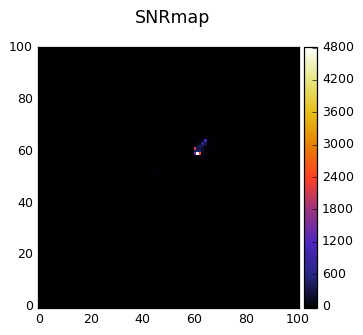

SNR map created using 2 processes.
Running time:  0:00:00.857635
-------------------------------------------------------------------


In [426]:
snrmap_llsg = vip.phot.snrmap(fr_llsg, fwhm_naco, plot=True)

The increase in SNR is enormous. Not let's try LLSG on the fake companion that we previously injected:

In [523]:
fr_llsg2 = vip.llsg.llsg(cubefc, angs, fwhm_naco, rank=8, thresh=1.2, max_iter=100)

-------------------------------------------------------------------
Starting time: 2016-02-11 01:12:32
-------------------------------------------------------------------
5 annuli, Ann width = 10, FWHM = 4.600

Running time:  0:00:04.216651
-------------------------------------------------------------------


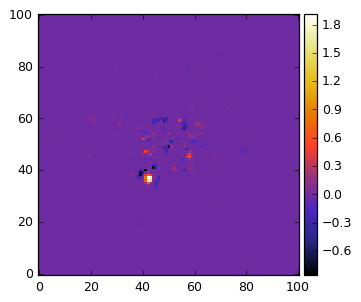

In [524]:
plots(fr_llsg2, colorb=True)

In [525]:
_ = vip.phot.frame_quick_report(fr_llsg2, fwhm=fwhm_naco, source_xy=(42,37))

Coordinates of chosen px X,Y = 42,37
Central pixel SNR: 
SNR = 15.4867921853
Flux = 24.820, Mean Flux BKG aper = 14.076
Stddev BKG aper = 0.676
-----------------------------------------
In 1*FWHM circular aperture:
Integrated flux = 10.624
Mean SNR = 12.603
Max SNR = 21.532, stddev SNRs = 5.516
-----------------------------------------


Again we have a clear improvement in SNR.

[Go to the top](#Table-of-contents)

--------

## 4. Processing RDI data

In case we have a reference star, we can plug it in in the full-frame PCA function to perform Reference Star Differential Imaging.

### 4.1. PCA with a reference

We'll simulate a set of references using the cube with the planet subtracted. Let's mean-collapse every 2 frames to end up with 30 frames and upscale them a bit. We do this to decorrelate the frames and make them less similar (that changes slightly the low-rank inner structure).  

In [526]:
cube_ref = vip.calib.cube_subsample(cube_emp, n=2, mode='mean')


Initial # of frames and window are not multiples. A few frames were dropped.


In [527]:
cube_ref = vip.calib.cube_px_resampling(cube_ref, scale=1.1)
cube_ref = vip.calib.cube_crop_frames(cube_ref, 101)


Cube cropped with new size [30,101,101].


[Go to the top](#Table-of-contents)

#### 4.1.1. Full frame RDI PCA

We plug in the reference cube in the full-frame PCA function. This reference library of frames is used to extract the principal components onto which we'll project our science (target) frames. Let's test it with the syntethic companion previously injected.

In [723]:
fr_rdi = vip.pca.pca(cubefc, angs, cube_ref, ncomp=30, scaling='temp-standard')

-------------------------------------------------------------------
Starting time: 2016-02-11 22:56:26
-------------------------------------------------------------------
Done building the matrix, NxP where N=# frames and P=# pixels per frame
Done building the matrix, NxP where N=# frames and P=# pixels per frame
Done SVD/PCA with numpy SVD (LAPACK)
Running time:  0:00:00.029101
-------------------------------------------------------------------
Done de-rotating and combining
Running time:  0:00:00.060282
-------------------------------------------------------------------


In [724]:
fr_rdi2 = vip.pca.pca(cubefc, angs, cube_ref, ncomp=30, scaling='temp-mean')

-------------------------------------------------------------------
Starting time: 2016-02-11 22:56:31
-------------------------------------------------------------------
Done building the matrix, NxP where N=# frames and P=# pixels per frame
Done building the matrix, NxP where N=# frames and P=# pixels per frame
Done SVD/PCA with numpy SVD (LAPACK)
Running time:  0:00:00.020758
-------------------------------------------------------------------
Done de-rotating and combining
Running time:  0:00:00.049201
-------------------------------------------------------------------


In [725]:
ds9.display(fr_pca3,fr_rdi,fr_rdi2)

We can compare visually the results of the full-frame ADI PCA and full-frame RDI PCA. They bring similar SNR.

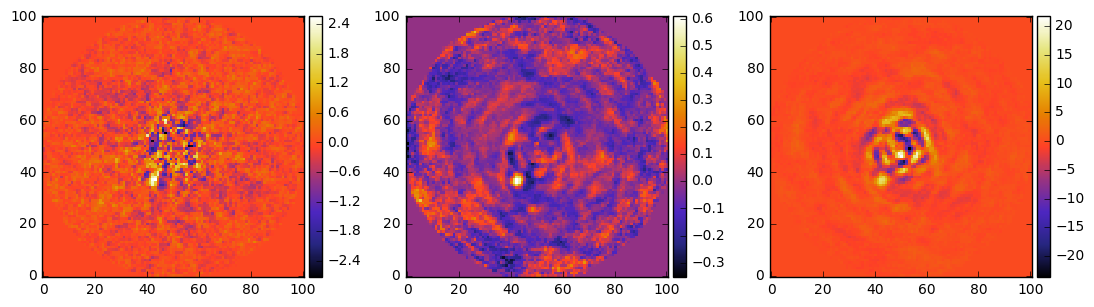

In [726]:
plots(fr_pca3, fr_rdi, fr_rdi2, dpi=100, colorb=True)

[Go to the top](#Table-of-contents)

#### 4.1.2. Annular RDI PCA

In the case of having a large number of reference images, e.g. for a survey on a single instrument, we can afford a better selection of the library by constraining the correlation with the median of the science dataset and by working on an annulus-wise way.

In [785]:
from vip.pca.pca_local import pca_rdi_annular

In [810]:
fr_rdi3 = pca_rdi_annular(cubefc, angs, array_ref=cube_ref, radius_int=0, 
                          asize=2, ncomp=None, svd_mode='lapack', min_corr=0.8, 
                          fwhm=fwhm_naco, verbose=True, debug=False)

-------------------------------------------------------------------
Starting time: 2016-02-12 11:56:25
-------------------------------------------------------------------
# annuli = 5, Ann width = 9, FWHM = 4.600

PCA will be done locally per annulus and per quadrant.

Annulus 1, Inn radius = 0.00, Ann center = 4.50 
# frames in LIB = 30
# PCs = 11
Done PCA with lapack for current annulus
Running time:  0:00:00.012776
-------------------------------------------------------------------
Annulus 2, Inn radius = 9.00, Ann center = 13.50 
# frames in LIB = 30
# PCs = 8
Done PCA with lapack for current annulus
Running time:  0:00:00.030267
-------------------------------------------------------------------
Annulus 3, Inn radius = 18.00, Ann center = 22.50 
# frames in LIB = 30
# PCs = 7
Done PCA with lapack for current annulus
Running time:  0:00:00.051547
-------------------------------------------------------------------
Annulus 4, Inn radius = 27.00, Ann center = 31.50 
# frames in LIB = 

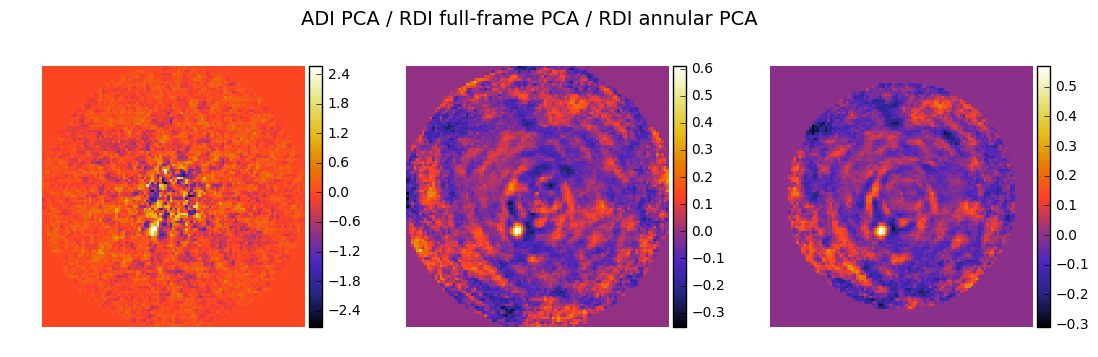

In [811]:
plots(fr_pca3, fr_rdi, fr_rdi3, dpi=100, colorb=True, noaxis=True,
      title='ADI PCA / RDI full-frame PCA / RDI annular PCA')

In [812]:
ds9.display(fr_pca3, fr_rdi, fr_rdi2, fr_rdi3)

The improvement is not very obvious in this toy example besides achieving a better planet PSF. The result is very close to what we get with full-frame PCA because of the way we set our toy reference cube. The correlation is high enough to leave almost all the reference frames in the library. The correlation and the annulus-wise treatment play a bigger role when having large number of images (large library of different datacubes). 

[Go to the top](#Table-of-contents)

### 4.2. Flux and position estimation for RDI

Let's test this with the syntethic cube. Both functions *firstguess()* and *run_mcmc_astrometry()* accept a parameter *cube_ref* that triggers the RDI PCA.


************************************************************
             Planet 0           
************************************************************

Planet 0: flux estimation at the position [42,37], running ...
Step | flux    | chi2r
1/20   50.000   9.990
2/20   68.421   9.953
3/20   86.842   9.917
4/20   105.263   9.885
5/20   123.684   9.856
6/20   142.105   9.828
7/20   160.526   9.799
8/20   178.947   9.770
9/20   197.368   9.740
10/20   215.789   9.716
11/20   234.211   9.703
12/20   252.632   9.692
13/20   271.053   9.686
14/20   289.474   9.684
15/20   307.895   9.694
16/20   326.316   9.712
17/20   344.737   9.737
18/20   363.158   9.767
19/20   381.579   9.796
20/20   400.000   9.826


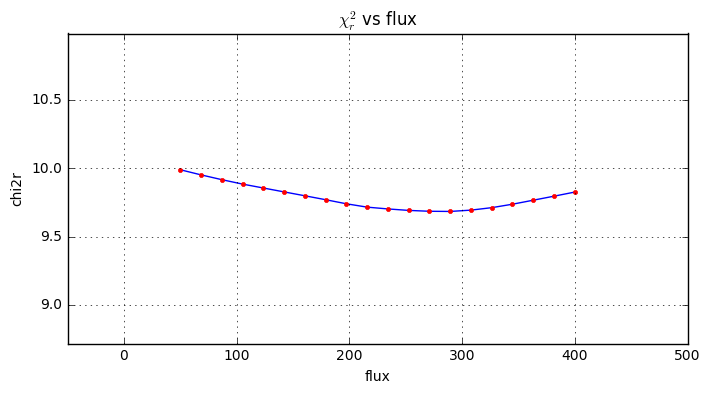

Planet 0: preliminary guess: (r,theta,f) = (15.9530561335,237.804266065,289.473684211)
Planet 0: Simplex Nelder-Mead minimization, running ...
Planet 0: Success: True, nit: 114, nfev: 275, chi2r: 9.58441272281
message: Optimization terminated successfully.
Planet 0: first guess: (r_0, theta_0, f_0) = (16.7422743638,238.690999997,256.16008226)

************************************************************
DONE !
************************************************************
[ 35.69578228] [ 41.29982148]


In [557]:
# Initial guess of the position by examining a flux frame or SNR map
planet_xycoord = np.array([[42,37]])
# Naive minimization of the chi^2 by trying this grid of values for the flux 
f_range = np.linspace(50,400,20)

# If the parameter simplex=True then a Nelder-Mead (simplex) minimization is 
# done based on the preliminary guess of the naive minimization. Here we setup
# the maximum number of iterations and error (see scipy.minimize function)
simplex_options = {'xtol':1e-8, 'maxiter':500, 'maxfev':1000}

# plot with the behaviour of the chi^2 with the naive minimization
figure_options = {'color':'b','marker':'.', 
                  'xlim': [f_range[0]-100,f_range[-1]+100], 
                  'title':r'$\chi^2_{r}$ vs flux'}

r_0, theta_0, f_0 = vip.negfc.firstguess(cubefc, angs, psf, 20, pxscale_naco,
                                         3*fwhm_naco, 4*fwhm_naco, 
                                         planets_xy_coord=planet_xycoord,
                                         cube_ref=cube_ref, 
                                         svd_mode='lapack',scaling=None,
                                         f_range=f_range, simplex=True, 
                                         simplex_options=simplex_options,
                                         display=True, verbose=True, save=False,
                                         figure_options=figure_options)

centy, centx = vip.var. frame_center(cube[0])
posy = r_0 * np.sin(np.deg2rad(theta_0)) + centy
posx = r_0 * np.cos(np.deg2rad(theta_0)) + centx
print posy, posx

The results of the simplex minimization are close to the parameters of this injected companion (r_0, theta_0, f_0) = (15, 240, 250).

Now let's try the MCMC method:

In [558]:
# Walker initial states: each walker will start in a small ball around 
# this preferred position (first guess using naive or simplex minimization)
initialState = np.array([15.9530561335,237.804266065,289.473684211])

# for the MCMC sampler
nwalkers, itermin, itermax = (50,100,500)
output_file = 'Cube{}_ncomp_{}_date_{}'.format('x','20','20151028')

chain2 = vip.negfc.run_mcmc_astrometry(cubefc, angs, psf, 20, pxscale_naco,                                
                                       3*fwhm_naco, 4*fwhm_naco, 
                                       cube_ref=cube_ref, svd_mode='lapack',
                                       scaling='temp-standard',
                                       nwalkers=nwalkers, bounds=None,
                                       initialState=initialState,
                                       niteration_min=itermin,
                                       niteration_limit=itermax,
                                       check_maxgap=50, threads=1,
                                       output_file=output_file,
                                       display=False, verbose=False, save=False, 
                                       rhat_threshold=1.01, niteration_supp=0)


We have reached the limit number of steps without having converged


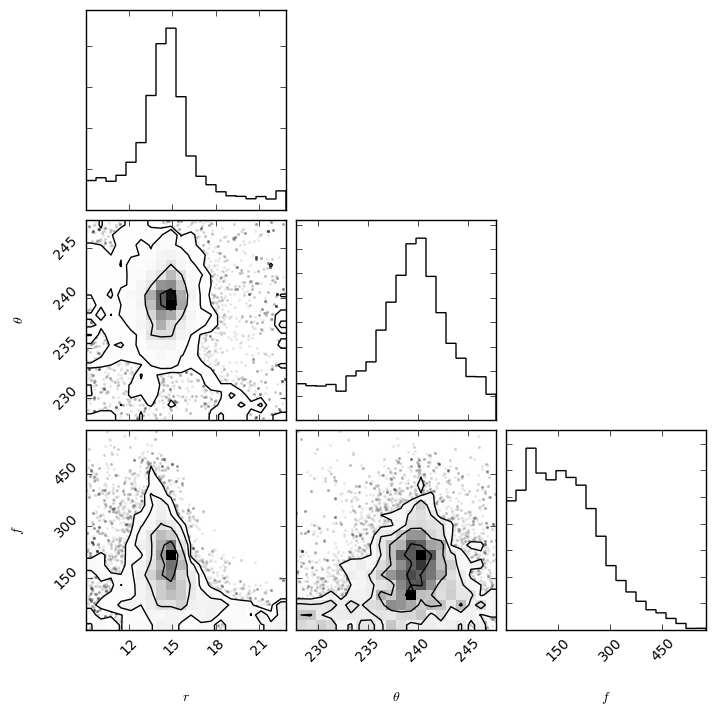

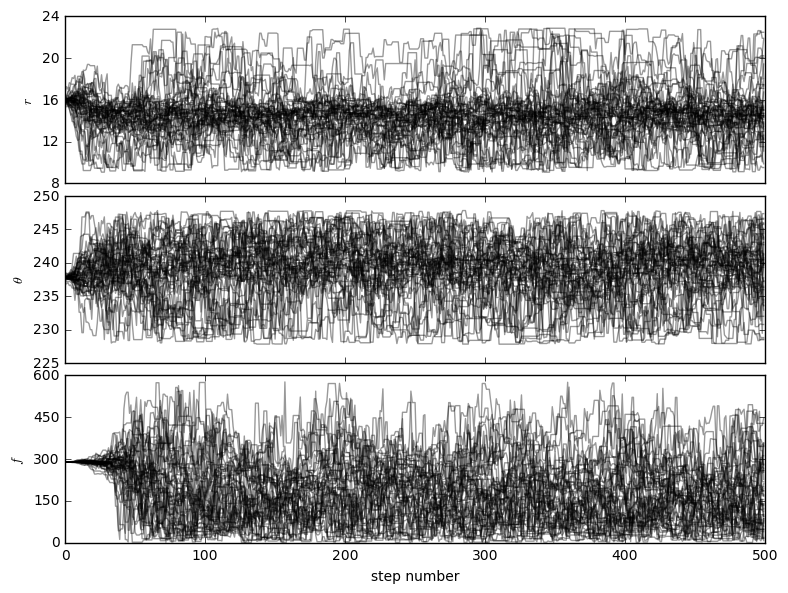

In [559]:
vip.negfc.mcmc_opt.showPDFCorner(chain2)
vip.negfc.mcmc_opt.showWalk(chain2)

Even though we haven't run the MCMC chain long enough to reach convergence, we can confirm visually that the result was getting closer to the grountruth (r_0, theta_0, f_0) = (15, 240, 250).

[Go to the top](#Table-of-contents)

### 4.3. Contrast curve generation for RDI

Using the empty cube and the reference toy cube we can generate constrast curves for RDI. The function *contrast_curve* accepts a parameter *algo* which determines the type of processing. We can use "pca-rdi-fullfr" or "pca-rdi-annular". Also any aditional parameters to the PCA function can be passed to *contrast_curve*.

Measuring the throughput 

SIGMA=5
STARPHOT=764939.6


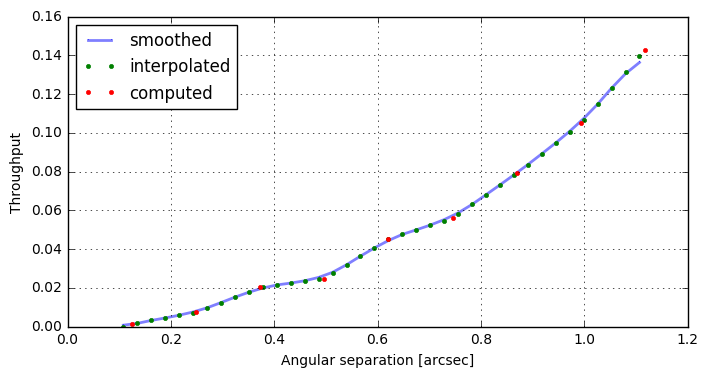

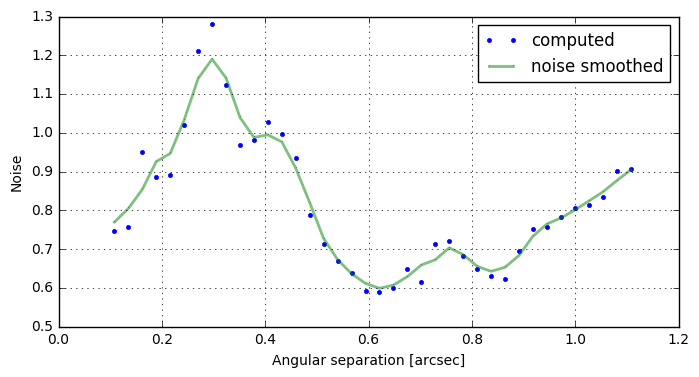

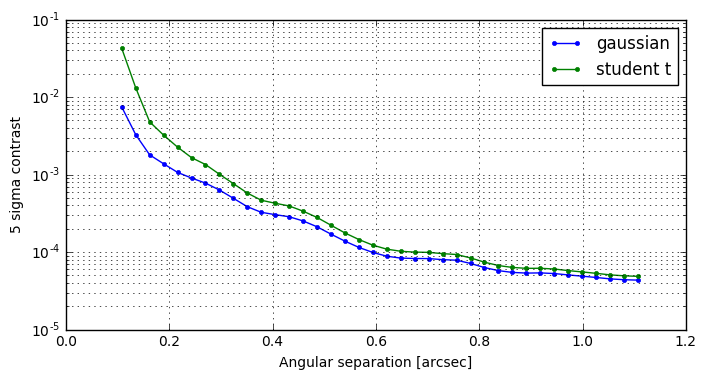

In [727]:
starphot = 764939.6
_ = vip.phot.contrcurve.contrast_curve(cube_emp, angs, psf, fwhm_naco,
                                       algo='pca-rdi-fullfr', cube_ref=cube_ref,
                                       pxscale=pxscale_naco, starphot=starphot, 
                                       sigma=5, nbranch=1, ncomp=30, 
                                       scaling='temp-standard', debug=True)

Measuring the throughput 

SIGMA=5
STARPHOT=764939.6


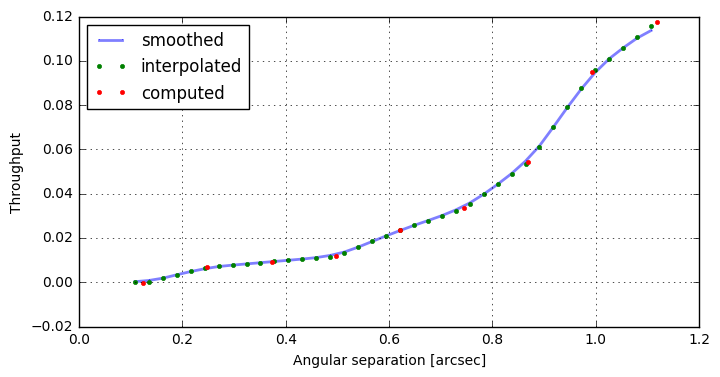

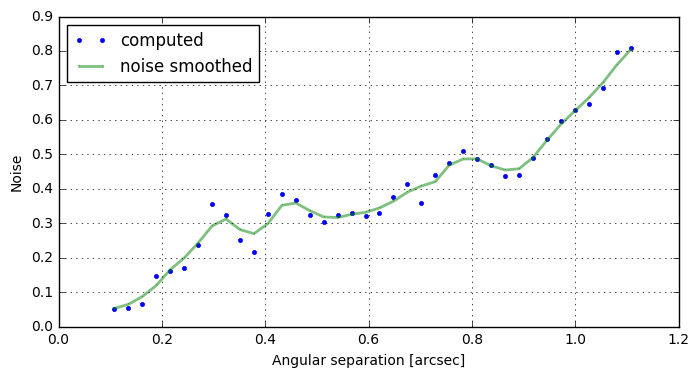

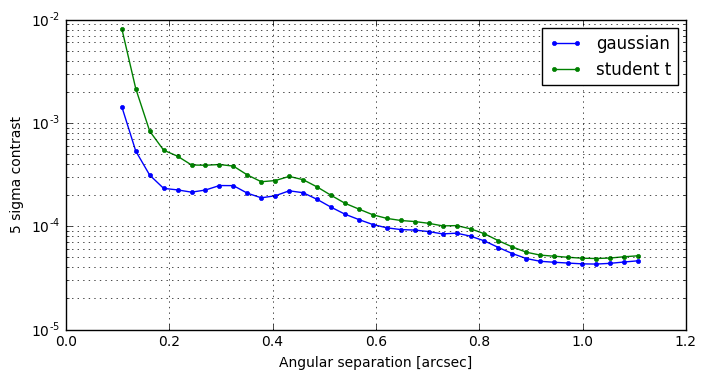

In [728]:
starphot = 764939.6
_ = vip.phot.contrcurve.contrast_curve(cube_emp, angs, psf, fwhm_naco,
                                       algo='pca-rdi-annular', cube_ref=cube_ref,
                                       pxscale=pxscale_naco, starphot=starphot, 
                                       sigma=5, nbranch=1, ncomp=30, min_corr=0.5,
                                       debug=True)

[Go to the top](#Table-of-contents)

--------

## 5. Processing IFS data

Let's try processing data cubes result of a different observing technique. In this case we will have a SPHERE IFS 4d cube [# channels, # adi-frames, Y, X] with syntethic companions injected. Unfortunately the cubes are too big to be shared through github (few GB). You won't be able to re-run this cells, but they will serve to illustrate the PCA processing of an IFS cube.

In [66]:
cube_ifs = vip.fits.open_fits(cube_ifs)


Fits HDU:0 data successfully loaded. Data shape: [39,80,320,320]


In this case we have 39 spectral channels and 80 ADI multi-spectral frames (with 39 wavelengths) with size 320x320.

In [67]:
angs_ifs = vip.fits.open_fits(angs_ifs)


Fits HDU:0 data successfully loaded. Data shape: [80]


In [68]:
scal_vec = vip.fits.open_fits(scal_vec)


Fits HDU:0 data successfully loaded. Data shape: [39]


We create the scaling factors using the central wavelength of each channel:

In [69]:
scal_vec = scal_vec.max()/scal_vec

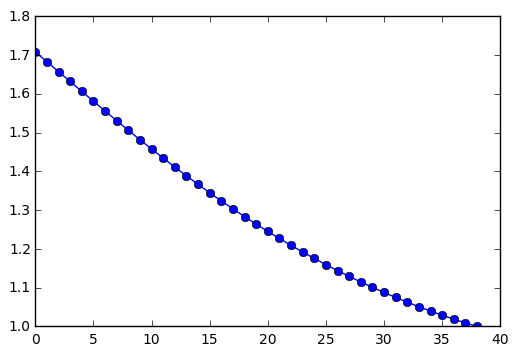

In [70]:
plot(scal_vec, 'o-')

In [325]:
scal_vec = vip.calib.check_scal_vector(scal_vec)

[Go to the top](#Table-of-contents)

### 5.1. PCA of a single multi spectral frame

In this case we assume we have a cube (3d array) that contains 1 frame at multiple spectral channels. The frames need to be re-scaled (to match the longest wavelenght) in order to get a sequence where the planet moves radially with respect to the speckles. Then PCA is applied on this re-scaled cube. We can simulate this by slicing our cube:

In [202]:
frame_ifs10 = cube_ifs[:,10,:,:]

In [219]:
frame_ifs10.shape

(39, 320, 320)

Let's take a look at the stretching of the quasi-static speckle field as the wavelenght increases:

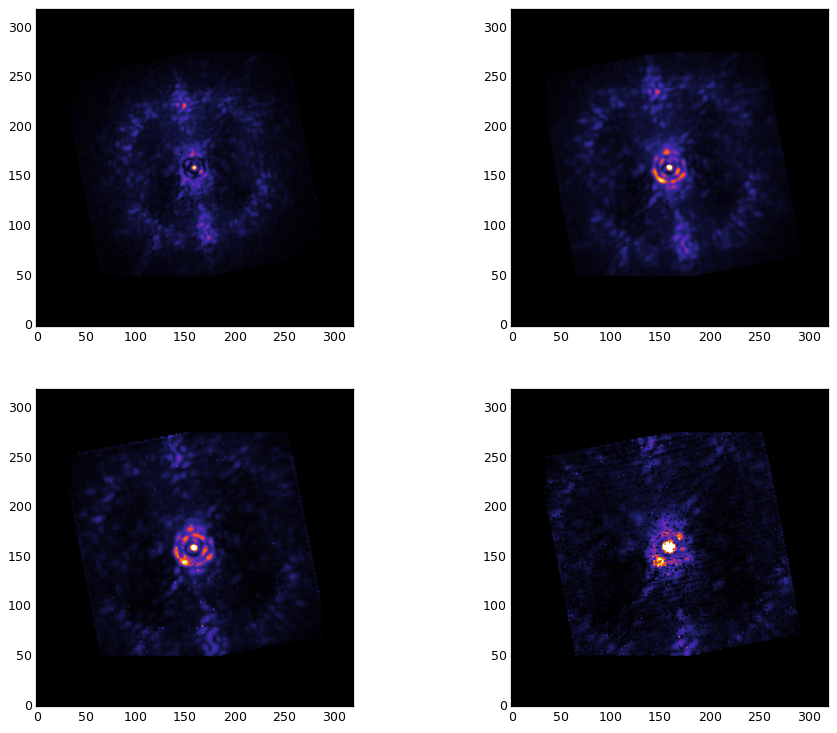

In [229]:
plots(frame_ifs10[0], frame_ifs10[12], frame_ifs10[24], frame_ifs10[38],
      vmin=0, vmax=0.05, rows=2)

Let's process it:

In [204]:
fr_pca_ifs = vip.pca.pca(frame_ifs10, None, scale_list=scal_vec,
                         svd_mode='randsvd', ncomp=2, full_output=False, 
                         verbose=True, debug=False)

-------------------------------------------------------------------
Starting time: 2015-10-30 07:10:31
-------------------------------------------------------------------
39 spectral channels in IFS cube
Done creating and centering the matrix
Done SVD/PCA with randomized SVD
Running time:  0:00:01.052189
-------------------------------------------------------------------
Done re-scaling and combining
Running time:  0:00:01.496295
-------------------------------------------------------------------


In [205]:
ds9.display(fr_pca_ifs)

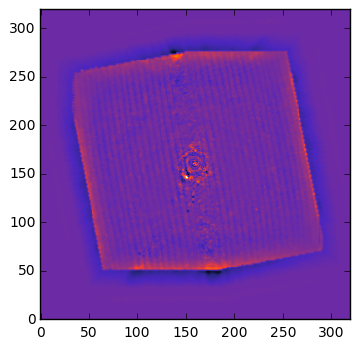

In [214]:
plots(fr_pca_ifs, dpi=100, size=4)

Detailed visual inspection shows some blobs (point-like sources) at low SNR. 

[Go to the top](#Table-of-contents)

### 5.2. Two-stage PCA of several multi spectral frames

Let's use the whole cube, the 80 frames (IFS + ADI), by computing a two-stage PCA. We need to provide the function with all the information we have: the 4d cube, the PAs, the scaling factors, and two different number of principal components (ncomp and ncomp2). Please read the function docstring for more information.

In [209]:
vip.pca.pca?

In [199]:
fr_pca_ifs_adi = vip.pca.pca(cube_ifs, -angs_ifs, scale_list=scal_vec,
                             svd_mode='randsvd', ncomp=2, ncomp2=20, 
                             mask_center_px=10, scaling=None,
                             full_output=False, verbose=True, debug=False)

-------------------------------------------------------------------
Starting time: 2015-10-30 01:09:05
-------------------------------------------------------------------
39 spectral channels in IFS cube
80 ADI frames in all channels
Looping through ADI frames
0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 108.383 sec
Done PCA per ADI multi-spectral frame, de-rotating and combining
Running time:  0:01:49.394797
-------------------------------------------------------------------


In [200]:
ds9.display(fr_pca_ifs_adi)

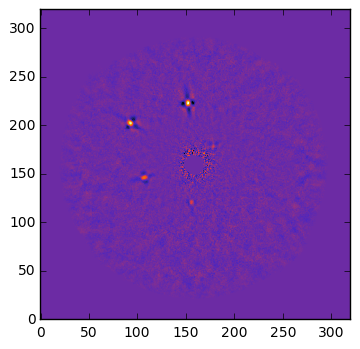

In [218]:
plots(fr_pca_ifs_adi, dpi=100, size=4)

And voila! By carefully tunning how many PCs we will retain in each stage we reach a nice result, showing clearly the 5 fake companions. This is an example of how fast VIP can be: processing a 2.6 GB IFS cube in ~2 minutes!

[Go to the top](#Table-of-contents)

--------

## 6. Additional functionality

We won't provide the FITS files for the following items (couple of pre-processing tasks) due to size constraints.

### 6.1. Bad frames detection

I load here an IRDIS data cube. It has 52 ADI frames with size 1024x2048.

In [231]:
cube_irdis = vip.fits.open_fits(irdis)


Fits HDU:0 data successfully loaded. Data shape: [52,1024,2048]


Let's first crop one of the channels of IRDIS:

In [233]:
cube_left = vortex.calib.cube_crop_frames(cube_irdis, 201, 520, 487)


Cube cropped; new size [52,201,201] centered at (520,487).


In [236]:
ds9.display(cube_left)

Here we see a good frame and a bad frame that needs to be discarded before post-processing (e.g. PCA-ADI):

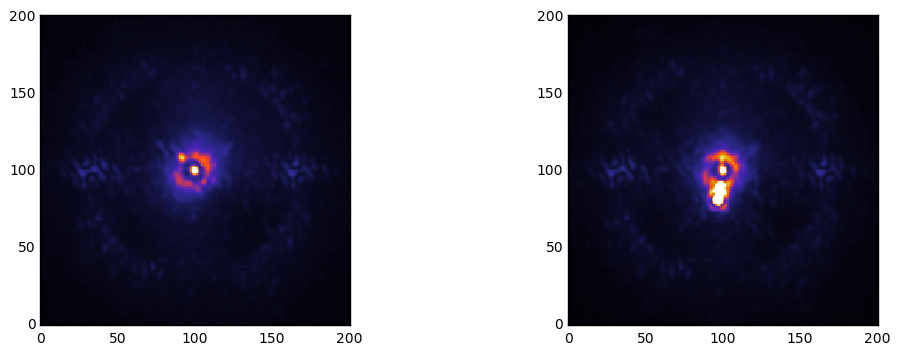

In [240]:
plots(cube_left[0], cube_left[49], dpi=100, vmin=0, vmax=7000, size=4)

Here it's illustrated how to create a widget to modify the parameters of two bad frames detection functions in VIP:

In [251]:
vip.calib.cube_detect_badfr_pxstats?

In [252]:
vip.calib.cube_detect_badfr_correlation?

In [249]:
from IPython.html.widgets import FloatSlider as FlSlider
from IPython.html.widgets import Dropdown, interact_manual, interact
from IPython.display import display, clear_output

def detect_badfr_widget(cube, method='corr', ref=0):
    """
    """
    def slider_vpxst(upsig):
        func = vip.calib.cube_detect_badfr_pxstats
        print "upper sigma = {}".format(upsig)
        fwhm = 4
        gind, bind = func(cube, mode='annulus', in_radius=fwhm, width=3*fwhm,
                          top_sigma=upsig, low_sigma=1, plot=True)
        #print "bad frames : {}".format(bind)
    def slider_corr(perc):
        func = vip.calib.cube_detect_badfr_correlation
        print "perc = {}".format(perc)
        gind, bind = func(cube, ref, dist='pearson', percentile=perc, plot=True)
        #print "bad frames : {}".format(bind)
    
    if method=='pxstat':
        interact(slider_vpxst, upsig=FlSlider(min=0.0, max=2.0, 
                                                     value=1.0, step=0.1))
    elif method=='corr':
        interact(slider_corr, perc=FlSlider(min=1.0, max=50.0,
                                                   value=17.0, step=0.5))



perc = 3.0
-------------------------------------------------------------------
Starting time: 2015-10-30 08:06:33
-------------------------------------------------------------------
Done detecting bad frames from cube: 2 out of 52 (3.85%)
Running time:  0:00:00.054670
-------------------------------------------------------------------


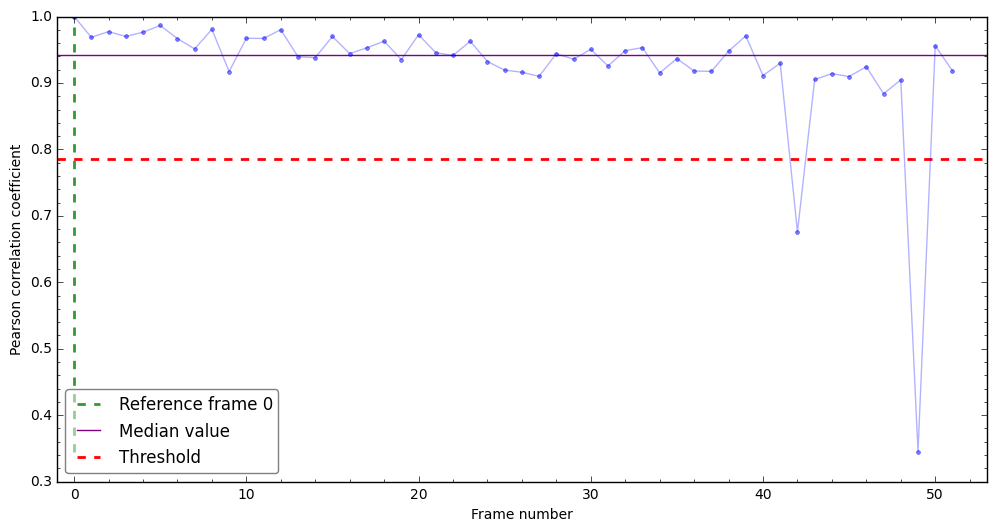

In [250]:
detect_badfr_widget(cube_left, method='corr', ref=0)

You can change method to 'pxstat' and change with the slider the value of the parameter. Once we set a value, we call the actual function to get the indices and we slice the cube, keeping the good frames only. The same indices can be used to slice the PA vector.

In [254]:
goind, baind = vip.calib.cube_detect_badfr_correlation(cube_left, 0,
                                                       dist='pearson', 
                                                       percentile=3)

-------------------------------------------------------------------
Starting time: 2015-10-30 08:08:35
-------------------------------------------------------------------
Done detecting bad frames from cube: 2 out of 52 (3.85%)
Running time:  0:00:00.009087
-------------------------------------------------------------------


In [255]:
print baind

[42 49]


Let's take a look at the result:

In [256]:
ds9.display(cube_left[goind])

[Go to the top](#Table-of-contents)

### 6.2. Centering with Radon Transform

Radon Transform maps lines onto points, we can then use speckles (and/or satellite spots) to estimate the location of the star in a coronagraphic image (see Pueyo et al. 2015).

Location of the star is estimated by calculating the radon transform of a given broadband image over a grid of trial centers (x0,y0), and find the location that maximizes the modulus (square) of the Radon transform over the s = 0 horizontal axis.

In [14]:
fr_broad = vip.fits.open_fits(path_broad)
fr_broad = vip.calib.frame_crop(fr_broad, 151, 472, 472)


Fits HDU:0 data successfully loaded. Data shape: [940,940]

Done frame cropping


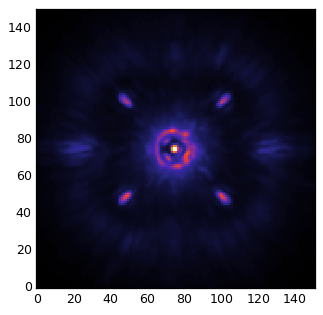

In [15]:
plots(fr_broad, size=4)

-------------------------------------------------------------------
Starting time: 2015-10-30 08:47:37
-------------------------------------------------------------------


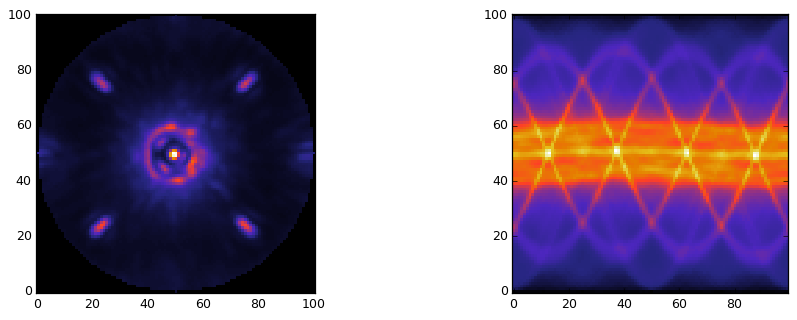

56909203.6446
Done 1681 radon transform calls distributed in 2 processes


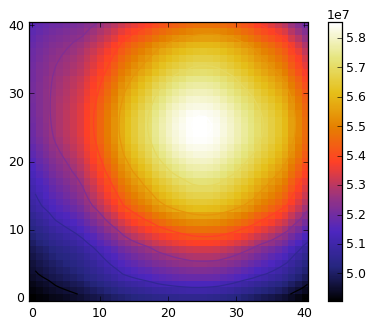

Cost function max: 58545251.067
Cost function # maxima: 1
Finished grid search radon optimization. Y=0.50000, X=0.40000
Running time:  0:00:31.724620
-------------------------------------------------------------------


(0.5, 0.40000000000000036)

In [16]:
vip.calib.frame_center_radon(fr_broad, cropsize=101, wavelet=False, 
                             mask_center=None, hsize=2, step=0.1, nproc=2, 
                             debug=True)

[Go to the top](#Table-of-contents)

### 6.3. Centering by fitting the waffle pattern

We will work here with SPHERE data taking in DBI mode, using the broadband H-band filter. In this images we have elongated satellite spots that can be used to determine the (uncertainty) location of the star.

In [730]:
cube_sphere = vip.fits.open_fits(path_sphere_broadband)


Fits HDU:0 data successfully loaded. Data shape: [185,511,511]


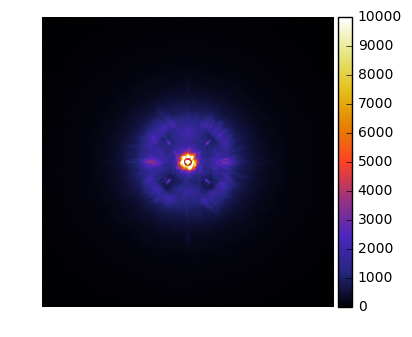

In [739]:
plots(cube_sphere[0], vmin=0, dpi=100, vmax=10000, colorb=True, noaxis=True)

In [731]:
from vip.calib import cube_recenter_satspots

We need to provide the position of the satellite spots (visual inspection):

In [741]:
waf = [(222,289),(289,289),(221,221),(290,221)]

The function *cube_recenter_satspots* will obtain the centroids of the spots via a 2d Gaussian fit and then will find the intersection between upper-left to bottom-right and upper-right to bottom-left lines.

-------------------------------------------------------------------
Starting time: 2016-02-12 00:02:41
-------------------------------------------------------------------
Looping through frames
0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 9.295 sec
Running time:  0:00:09.295439
-------------------------------------------------------------------
AVE X,Y 0.713607470691 0.180933348533
MED X,Y 0.71103482214 0.180635598198
STD X,Y 0.0572018454959 0.0811299242301


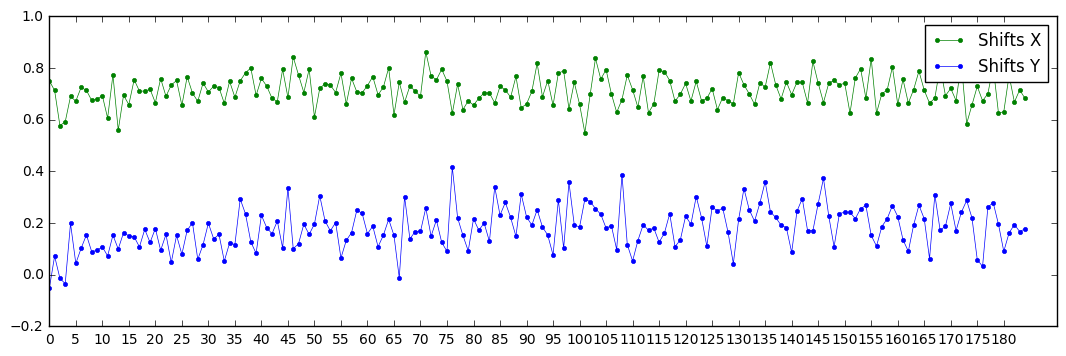

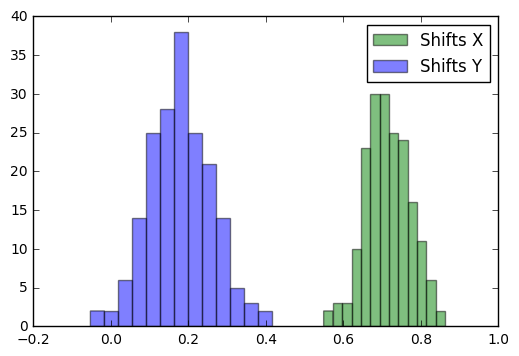

In [744]:
res = cube_recenter_satspots(cube_sphere, waf, subim_size=15, debug=False,
                             sigfactor=5)

[Go to the top](#Table-of-contents)

--------

## 7. Final words

I hope this tutorial was useful. Unfortunately, showing all of VIP functionalities here won't be possible, please explore it on your own. We currently work on the paper describing VIP and a more detailed documentation (webpage and/or PDF) for it.

[Go to the top](#Table-of-contents)